# Fraud Detection Analysis
This notebook provides an analysis of a fraud detection dataset. The objective is to understand patterns of fraudulent behavior and develop insights that could inform decision-making processes in fraud prevention systems.

# Part 1 Recognizing Anomalies

The first half our work will be building models to detect the anomaly pattern and recognize what is the potential cuase of this period of increasing fraud.

In [1]:
import pandas as pd

## Dataset Overview
The dataset contains information about applications, including features such as:
- Application ID
- Product type
- Industry
- Location (city and state)
- Application date
- Fraud-related indicators such as fraud scores and credit scores

The dataset will be loaded and explored in the following steps.

## Loading the Dataset
The dataset is imported using pandas.

In [2]:
fraud = pd.read_excel('FraudCaseStudy.xlsx')

## Exploring the Data
Initial data exploration includes examining the dataset's structure.

In [3]:
fraud.head()

application_id  product      industry             city state  \
0  2454736213109889  Desktop  Retail Trade  CHICAGO HEIGHTS    IL   
1  2406652813647864  Desktop      Services     WINTER HAVEN    FL   
2  2491009212283403  Desktop      Services          MADISON    WI   
3  2349701212241921  Desktop  Retail Trade     FAYETTEVILLE    AR   
4  2380050314918284  Desktop      Services        CLEVELAND    OH   

  application_date final_decision  is_fraud  credit_score  fraud_score  \
0       2019-09-07       APPROVED         0          5.50       40.050   
1       2019-09-30       APPROVED         0          9.38        4.800   
2       2019-08-12       DECLINED         0          9.25       78.500   
3       2019-09-26       APPROVED         0          8.53        4.925   
4       2019-08-24       APPROVED         0          8.25        5.200   

  first_transaction_date  
0             2019-09-11  
1             2019-09-30  
2                    NaT  
3                    NaT  
4             2019-09-09

In [4]:
fraud.shape

(233839, 11)

## Data Cleaning & EDA
In this section, we will handle missing values, remove duplicates, and preprocess columns to ensure the dataset is ready for analysis.

Here's an overview of number of data missing is each column:

In [5]:
fraud.isna().sum()

application_id                 0
product                        0
industry                       0
city                           0
state                          0
application_date               0
final_decision                 0
is_fraud                       0
credit_score               14071
fraud_score                 5447
first_transaction_date    129095
dtype: int64

Now let's check column one by one. For `application_id`, I am checking whether each id is unique avoiding duplicate rows.

In [6]:
# check for application_id
print(len(fraud['application_id'].unique()))
fraud['application_id'].unique()

233839


array([2454736213109889, 2406652813647864, 2491009212283403, ...,
       2364903814884193, 2380907513969725, 2361727112385166])

`application_id` looks good and now we move to the `product` column:

In [7]:
# check for product
fraud['product'].unique() # what is 'self-employee'?

array(['Desktop', 'Other', 'Mobile App', 'Online', 'Point of Sales',
       'Desktop (Mac)', 'Self-employee'], dtype=object)

Seems to be fine. What about `industry` column?

In [8]:
# check for industry
fraud['industry'].unique()

array(['Retail Trade', 'Services', 'Agriculture, Forestry, And Fishing',
       'Wholesale Trade', 'Construction',
       'Transportation, Communications, Electric, Gas, And Sanitary Services',
       'Manufacturing', 'Finance, Insurance, And Real Estate',
       'Public Administration'], dtype=object)

In [9]:
fraud.columns

Index(['application_id', 'product', 'industry', 'city', 'state',
       'application_date', 'final_decision', 'is_fraud', 'credit_score',
       'fraud_score', 'first_transaction_date'],
      dtype='object')

 Next to check is `city` and `state`

In [10]:
pd.Series(fraud['city'].unique())

0        CHICAGO HEIGHTS
1           WINTER HAVEN
2                MADISON
3           FAYETTEVILLE
4              CLEVELAND
              ...       
11337                GEM
11338           WHITELAW
11339             MANGUM
11340            WANAQUE
11341         ARROWSMITH
Length: 11342, dtype: object

In [11]:
pd.Series(fraud['state'].unique())

0     IL
1     FL
2     WI
3     AR
4     OH
5     CA
6     MT
7     WA
8     MI
9     ND
10    CT
11    IN
12    ID
13    GA
14    TX
15    LA
16    AL
17    NM
18    VA
19    MD
20    AZ
21    MA
22    CO
23    OR
24    NC
25    TN
26    OK
27    SC
28    NY
29    KS
30    DC
31    SD
32    PA
33    MN
34    UT
35    MO
36    KY
37    MS
38    ME
39    NJ
40    NV
41    WY
42    WV
43    IA
44    NE
45    AK
46    NH
47    HI
48    PR
49    RI
50    VT
51    DE
52    VI
53    AS
54    GU
55    PW
56    MP
57    MH
dtype: object

Everything looks okay so far. What about `application_date`?

In [12]:
# check for application date
fraud['application_date'].unique()

array(['2019-09-07T00:00:00.000000000', '2019-09-30T00:00:00.000000000',
       '2019-08-12T00:00:00.000000000', '2019-09-26T00:00:00.000000000',
       '2019-08-24T00:00:00.000000000', '2019-05-21T00:00:00.000000000',
       '2019-09-25T00:00:00.000000000', '2019-09-27T00:00:00.000000000',
       '2019-09-29T00:00:00.000000000', '2019-05-22T00:00:00.000000000',
       '2019-06-20T00:00:00.000000000', '2019-05-23T00:00:00.000000000',
       '2019-09-16T00:00:00.000000000', '2019-08-28T00:00:00.000000000',
       '2019-07-17T00:00:00.000000000', '2019-05-08T00:00:00.000000000',
       '2019-09-19T00:00:00.000000000', '2019-06-03T00:00:00.000000000',
       '2019-05-17T00:00:00.000000000', '2019-06-24T00:00:00.000000000',
       '2019-08-18T00:00:00.000000000', '2019-05-12T00:00:00.000000000',
       '2019-07-01T00:00:00.000000000', '2019-06-14T00:00:00.000000000',
       '2019-06-13T00:00:00.000000000', '2019-07-24T00:00:00.000000000',
       '2019-09-06T00:00:00.000000000', '2019-05-14

Looks good. Moving onto `final_decision`:

In [13]:
fraud['final_decision'].unique()

array(['APPROVED', 'DECLINED', 'PENDING', 'CANCELLED'], dtype=object)

The `is_fraud` column:

In [14]:
# check for is_fraud
fraud['is_fraud'].unique()

array([0, 1])

From now on, we are going to deal with some `np.nan` values.

In [15]:
import matplotlib.pyplot as plt
import numpy as np

In [16]:
fraud['credit_score'].dropna()

0         5.50
1         9.38
2         9.25
3         8.53
4         8.25
          ... 
233833    0.02
233834    6.94
233835    7.92
233836    8.29
233838    6.07
Name: credit_score, Length: 219768, dtype: float64

Let's visualize the distribution of `credit_score` to see how to better do imputation:

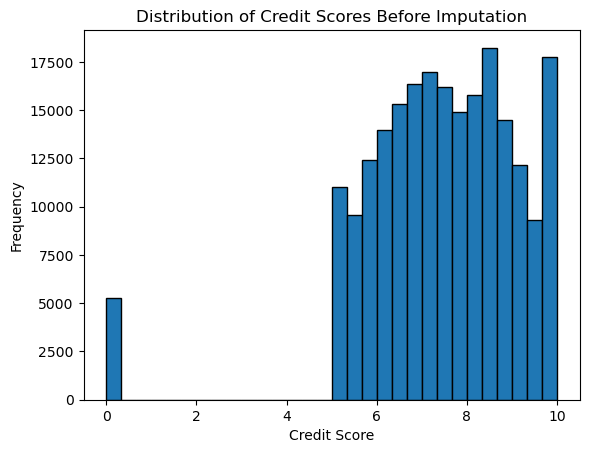

In [17]:
# check for credit_score
credit_scores = fraud['credit_score'].dropna()
zoom_range = (0, 10)
plt.hist(credit_scores, bins=30, range=zoom_range, edgecolor='black')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.title('Distribution of Credit Scores Before Imputation')

plt.show()

Would mean imputation be a good metrics?

In [18]:
# mean imputation?
mean = fraud['credit_score'].dropna().mean()
mean

7.398933602708309

Hmmm... this values seems to not be representative. What about imputation by groups? For example, if this missing value comes from a `is_fraud == 1` group, replace the value with the group's mean `credit_score`.

In [19]:
is_fraud_mean = fraud[fraud['is_fraud'] == 1]['credit_score'].dropna().mean()
print(is_fraud_mean)
not_fraud_mean = fraud[fraud['is_fraud'] == 0]['credit_score'].dropna().mean()
print(not_fraud_mean)

7.922807523655666
7.377427925836802


The values still seems not that representative. Let's do some machine learning imputation with KNN :)

In [20]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

In [21]:
# let's try KNN
fraud_for_imputation = fraud.copy().drop(columns = ['application_id', 'city', 'state'])
fraud_for_imputation['is_fraud'] = fraud_for_imputation['is_fraud'].apply(lambda x: True if x == 1 else False)

In [22]:
numerical_cols = fraud_for_imputation.select_dtypes(include=['float64', 'int64']).columns.drop('credit_score')
categorical_cols = fraud_for_imputation.select_dtypes(include=['object', 'boolean']).columns

In [23]:
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [24]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])
class DenseTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X.toarray() if hasattr(X, 'toarray') else X
credit_imputer = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('to_dense', DenseTransformer()),
    ('imputer', KNNImputer(n_neighbors=5))
])

In [25]:
pipeline_preprocess = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('to_dense', DenseTransformer())
])
preprocessed_data = pipeline_preprocess.fit_transform(fraud_for_imputation)

In [26]:
encoded_cat_cols = pipeline_preprocess.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_cols)
all_columns = numerical_cols.tolist() + encoded_cat_cols.tolist()
preprocessed_df = pd.DataFrame(preprocessed_data, columns=all_columns)
preprocessed_df['credit_score'] = fraud['credit_score']
preprocessed_df.head()

fraud_score  product_Desktop  product_Desktop (Mac)  product_Mobile App  \
0    -0.402814              1.0                    0.0                 0.0   
1    -0.490267              1.0                    0.0                 0.0   
2    -0.307423              1.0                    0.0                 0.0   
3    -0.489957              1.0                    0.0                 0.0   
4    -0.489274              1.0                    0.0                 0.0   

   product_Online  product_Other  product_Point of Sales  \
0             0.0            0.0                     0.0   
1             0.0            0.0                     0.0   
2             0.0            0.0                     0.0   
3             0.0            0.0                     0.0   
4             0.0            0.0                     0.0   

   product_Self-employee  industry_Agriculture, Forestry, And Fishing  \
0                    0.0                                          0.0   
1                    0.0                                          0.0   
2                    0.0                                          0.0   
3                    0.0                                          0.0   
4                    0.0                                          0.0   

   industry_Construction  ...  industry_Services  \
0                    0.0  ...                0.0   
1                    0.0  ...                1.0   
2                    0.0  ...                1.0   
3                    0.0  ...                0.0   
4                    0.0  ...                1.0   

   industry_Transportation, Communications, Electric, Gas, And Sanitary Services  \
0                                                0.0                               
1                                                0.0                               
2                                                0.0                               
3                                                0.0                               
4                                                0.0                               

   industry_Wholesale Trade  final_decision_APPROVED  \
0                       0.0                      1.0   
1                       0.0                      1.0   
2                       0.0                      0.0   
3                       0.0                      1.0   
4                       0.0                      1.0   

   final_decision_CANCELLED  final_decision_DECLINED  final_decision_PENDING  \
0                       0.0                      0.0                     0.0   
1                       0.0                      0.0                     0.0   
2                       0.0                      1.0                     0.0   
3                       0.0                      0.0                     0.0   
4                       0.0                      0.0                     0.0   

   is_fraud_False  is_fraud_True  credit_score  
0             1.0            0.0          5.50  
1             1.0            0.0          9.38  
2             1.0            0.0          9.25  
3             1.0            0.0          8.53  
4             1.0            0.0          8.25  

[5 rows x 24 columns]

In [27]:
chunk_size = 5000
chunks = [preprocessed_df.iloc[i:i + chunk_size] for i in range(0, preprocessed_df.shape[0], chunk_size)]
def impute_chunk(chunk):
    knn_imputer = KNNImputer(n_neighbors=5)
    imputed_chunk = knn_imputer.fit_transform(chunk)
    return pd.DataFrame(imputed_chunk, columns=chunk.columns)
imputed_chunks = [impute_chunk(chunk) for chunk in chunks]
imputed_df = pd.concat(imputed_chunks, axis=0)

In [28]:
fraud['credit_score'] = imputed_df['credit_score'].reset_index()['credit_score']

In [29]:
fraud.isna().sum()

application_id                 0
product                        0
industry                       0
city                           0
state                          0
application_date               0
final_decision                 0
is_fraud                       0
credit_score                   0
fraud_score                 5447
first_transaction_date    129095
dtype: int64

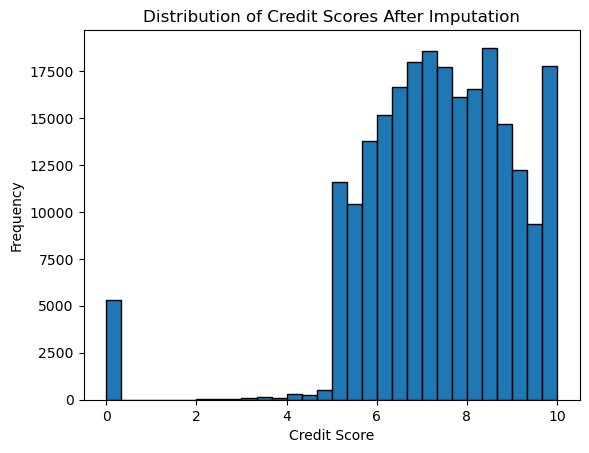

In [30]:
credit_scores = fraud['credit_score'].dropna()
zoom_range = (0, 10)
plt.hist(credit_scores, bins=30, range=zoom_range, edgecolor='black')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.title('Distribution of Credit Scores After Imputation')

plt.show()

Now there is no missing values in `credit_score` and we would do the same thing to the `fraud_score` column.

In [31]:
# same logic for fraud score
numerical_cols = fraud_for_imputation.select_dtypes(include=['float64', 'int64']).columns.drop('fraud_score')
categorical_cols = fraud_for_imputation.select_dtypes(include=['object', 'boolean']).columns

In [32]:
preprocessed_data = pipeline_preprocess.fit_transform(fraud_for_imputation)
encoded_cat_cols = pipeline_preprocess.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_cols)
all_columns = numerical_cols.tolist() + encoded_cat_cols.tolist()
preprocessed_df = pd.DataFrame(preprocessed_data, columns=all_columns)
preprocessed_df['fraud_score'] = fraud['fraud_score']
preprocessed_df.head()

credit_score  product_Desktop  product_Desktop (Mac)  product_Mobile App  \
0     -0.402814              1.0                    0.0                 0.0   
1     -0.490267              1.0                    0.0                 0.0   
2     -0.307423              1.0                    0.0                 0.0   
3     -0.489957              1.0                    0.0                 0.0   
4     -0.489274              1.0                    0.0                 0.0   

   product_Online  product_Other  product_Point of Sales  \
0             0.0            0.0                     0.0   
1             0.0            0.0                     0.0   
2             0.0            0.0                     0.0   
3             0.0            0.0                     0.0   
4             0.0            0.0                     0.0   

   product_Self-employee  industry_Agriculture, Forestry, And Fishing  \
0                    0.0                                          0.0   
1                    0.0                                          0.0   
2                    0.0                                          0.0   
3                    0.0                                          0.0   
4                    0.0                                          0.0   

   industry_Construction  ...  industry_Services  \
0                    0.0  ...                0.0   
1                    0.0  ...                1.0   
2                    0.0  ...                1.0   
3                    0.0  ...                0.0   
4                    0.0  ...                1.0   

   industry_Transportation, Communications, Electric, Gas, And Sanitary Services  \
0                                                0.0                               
1                                                0.0                               
2                                                0.0                               
3                                                0.0                               
4                                                0.0                               

   industry_Wholesale Trade  final_decision_APPROVED  \
0                       0.0                      1.0   
1                       0.0                      1.0   
2                       0.0                      0.0   
3                       0.0                      1.0   
4                       0.0                      1.0   

   final_decision_CANCELLED  final_decision_DECLINED  final_decision_PENDING  \
0                       0.0                      0.0                     0.0   
1                       0.0                      0.0                     0.0   
2                       0.0                      1.0                     0.0   
3                       0.0                      0.0                     0.0   
4                       0.0                      0.0                     0.0   

   is_fraud_False  is_fraud_True  fraud_score  
0             1.0            0.0       40.050  
1             1.0            0.0        4.800  
2             1.0            0.0       78.500  
3             1.0            0.0        4.925  
4             1.0            0.0        5.200  

[5 rows x 24 columns]

In [33]:
chunk_size = 1000
chunks = [preprocessed_df.iloc[i:i + chunk_size] for i in range(0, preprocessed_df.shape[0], chunk_size)]
def impute_chunk(chunk):
    knn_imputer = KNNImputer(n_neighbors=5)
    imputed_chunk = knn_imputer.fit_transform(chunk)
    return pd.DataFrame(imputed_chunk, columns=chunk.columns)
imputed_chunks = [impute_chunk(chunk) for chunk in chunks]
imputed_df = pd.concat(imputed_chunks, axis=0)

In [34]:
imputed_df.head()

credit_score  product_Desktop  product_Desktop (Mac)  product_Mobile App  \
0     -0.402814              1.0                    0.0                 0.0   
1     -0.490267              1.0                    0.0                 0.0   
2     -0.307423              1.0                    0.0                 0.0   
3     -0.489957              1.0                    0.0                 0.0   
4     -0.489274              1.0                    0.0                 0.0   

   product_Online  product_Other  product_Point of Sales  \
0             0.0            0.0                     0.0   
1             0.0            0.0                     0.0   
2             0.0            0.0                     0.0   
3             0.0            0.0                     0.0   
4             0.0            0.0                     0.0   

   product_Self-employee  industry_Agriculture, Forestry, And Fishing  \
0                    0.0                                          0.0   
1                    0.0                                          0.0   
2                    0.0                                          0.0   
3                    0.0                                          0.0   
4                    0.0                                          0.0   

   industry_Construction  ...  industry_Services  \
0                    0.0  ...                0.0   
1                    0.0  ...                1.0   
2                    0.0  ...                1.0   
3                    0.0  ...                0.0   
4                    0.0  ...                1.0   

   industry_Transportation, Communications, Electric, Gas, And Sanitary Services  \
0                                                0.0                               
1                                                0.0                               
2                                                0.0                               
3                                                0.0                               
4                                                0.0                               

   industry_Wholesale Trade  final_decision_APPROVED  \
0                       0.0                      1.0   
1                       0.0                      1.0   
2                       0.0                      0.0   
3                       0.0                      1.0   
4                       0.0                      1.0   

   final_decision_CANCELLED  final_decision_DECLINED  final_decision_PENDING  \
0                       0.0                      0.0                     0.0   
1                       0.0                      0.0                     0.0   
2                       0.0                      1.0                     0.0   
3                       0.0                      0.0                     0.0   
4                       0.0                      0.0                     0.0   

   is_fraud_False  is_fraud_True  fraud_score  
0             1.0            0.0       40.050  
1             1.0            0.0        4.800  
2             1.0            0.0       78.500  
3             1.0            0.0        4.925  
4             1.0            0.0        5.200  

[5 rows x 24 columns]

In [35]:
fraud['fraud_score'] = imputed_df['fraud_score'].reset_index()['fraud_score']

In [36]:
fraud.isna().sum()

application_id                 0
product                        0
industry                       0
city                           0
state                          0
application_date               0
final_decision                 0
is_fraud                       0
credit_score                   0
fraud_score                    0
first_transaction_date    129095
dtype: int64

Now let's check for anomalies in `first_transaction_date`:

In [37]:
# check for anomalies in first_transaction_date
(fraud['application_date'] > fraud['first_transaction_date']).sum()

1043

What?? First transaction date even earlier than the application date? 

In [38]:
fraud[fraud['application_date'] > fraud['first_transaction_date']]

application_id     product      industry           city state  \
581     2343372412010125     Desktop  Construction        BEDFORD    TX   
8366    2490956713073811     Desktop      Services       PORTLAND    OR   
11586   2210616413748047     Desktop      Services      SANTA ANA    CA   
23742   2339151314996981  Mobile App  Construction  OKLAHOMA CITY    OK   
23808   2404847413389706  Mobile App  Construction     SACRAMENTO    CA   
...                  ...         ...           ...            ...   ...   
198649  2326695212158758      Online      Services     FORT WORTH    TX   
198696  2382544113187986      Online      Services        HUNTLEY    IL   
198829  2312111214851202      Online      Services          MIAMI    FL   
198832  2427529513926029      Online      Services         TOLEDO    OH   
201674  2300285212927903       Other      Services     PLANTATION    FL   

       application_date final_decision  is_fraud  credit_score  fraud_score  \
581          2019-09-20       APPROVED         0          6.95       43.875   
8366         2019-07-03       APPROVED         0          6.98       45.600   
11586        2019-04-11       APPROVED         0          6.46      193.300   
23742        2019-09-28       APPROVED         1          5.43      732.200   
23808        2019-08-22       APPROVED         0          7.50       65.800   
...                 ...            ...       ...           ...          ...   
198649       2019-06-11       APPROVED         0          5.95       39.800   
198696       2019-04-04       DECLINED         0          6.01      551.905   
198829       2019-09-16       APPROVED         0          7.13       36.675   
198832       2019-04-04       APPROVED         0          5.01       75.950   
201674       2019-05-13       DECLINED         0          5.72        6.775   

       first_transaction_date  
581                2017-11-27  
8366               2019-04-04  
11586              2018-07-22  
23742              2019-09-13  
23808              2019-06-13  
...                       ...  
198649             2018-10-24  
198696             2017-03-28  
198829             2019-02-21  
198832             2019-04-01  
201674             2019-02-19  

[1043 rows x 11 columns]

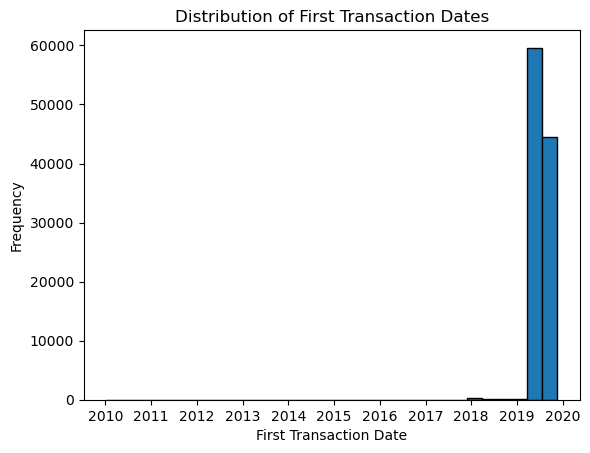

In [39]:
first_trans = fraud['first_transaction_date'].dropna()
plt.hist(first_trans, bins=30, edgecolor='black')
plt.xlabel('First Transaction Date')
plt.ylabel('Frequency')
plt.title('Distribution of First Transaction Dates')

plt.show()

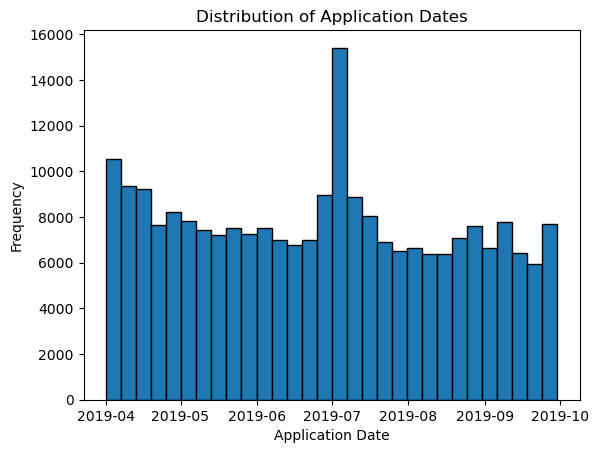

In [40]:
application_date = fraud['application_date'].dropna()
plt.hist(application_date, bins=30, edgecolor='black')
plt.xlabel('Application Date')
plt.ylabel('Frequency')
plt.title('Distribution of Application Dates')

plt.show()

From the two distributions above, we see that there is only a few records in `first_transaction_date` that are prior to 2019 and most of the application dates are around 2019, so I believe there is an error in recording those first transaction dates. I decided to replace these anomalies with their application date.

In [41]:
# might be a mistake when recording them, replace them with application date
def replace(first_transaction_date):
    application = fraud['application_date'].copy()
    copy = first_transaction_date.copy()
    for i in range(len(first_transaction_date)):
        if first_transaction_date.iloc[i] < application.iloc[i]:
            copy.iloc[i] = application.iloc[i]
    return copy
new_trans_date = replace(fraud['first_transaction_date'])
new_trans_date

0        2019-09-11
1        2019-09-30
2               NaT
3               NaT
4        2019-09-09
            ...    
233834          NaT
233835          NaT
233836   2019-07-18
233837          NaT
233838          NaT
Name: first_transaction_date, Length: 233839, dtype: datetime64[ns]

In [42]:
fraud.head()

application_id  product      industry             city state  \
0  2454736213109889  Desktop  Retail Trade  CHICAGO HEIGHTS    IL   
1  2406652813647864  Desktop      Services     WINTER HAVEN    FL   
2  2491009212283403  Desktop      Services          MADISON    WI   
3  2349701212241921  Desktop  Retail Trade     FAYETTEVILLE    AR   
4  2380050314918284  Desktop      Services        CLEVELAND    OH   

  application_date final_decision  is_fraud  credit_score  fraud_score  \
0       2019-09-07       APPROVED         0          5.50       40.050   
1       2019-09-30       APPROVED         0          9.38        4.800   
2       2019-08-12       DECLINED         0          9.25       78.500   
3       2019-09-26       APPROVED         0          8.53        4.925   
4       2019-08-24       APPROVED         0          8.25        5.200   

  first_transaction_date  
0             2019-09-11  
1             2019-09-30  
2                    NaT  
3                    NaT  
4             2019-09-09

In [43]:
fraud[fraud['first_transaction_date'].isna()]

application_id        product  \
2       2491009212283403        Desktop   
3       2349701212241921        Desktop   
5       2442615514058161        Desktop   
7       2395897013448723        Desktop   
8       2451914312163917        Desktop   
...                  ...            ...   
233833  2354703713637502  Self-employee   
233834  2447915212861646  Self-employee   
233835  2328997514409225  Self-employee   
233837  2380907513969725  Self-employee   
233838  2361727112385166  Self-employee   

                                                 industry           city  \
2                                                Services        MADISON   
3                                            Retail Trade   FAYETTEVILLE   
5                                            Retail Trade       EL MONTE   
7                                                Services      ARLINGTON   
8                                                Services         OLIVET   
...                                                   ...            ...   
233833                                           Services  OKLAHOMA CITY   
233834                                           Services  SILVER SPRING   
233835                                           Services        CONCORD   
233837  Transportation, Communications, Electric, Gas,...        DURANGO   
233838                                           Services       BROOKLYN   

       state application_date final_decision  is_fraud  credit_score  \
2         WI       2019-08-12       DECLINED         0         9.250   
3         AR       2019-09-26       APPROVED         0         8.530   
5         CA       2019-05-21       APPROVED         0         8.700   
7         WA       2019-09-27       APPROVED         0         9.480   
8         MI       2019-09-29       APPROVED         0         6.160   
...      ...              ...            ...       ...           ...   
233833    OK       2019-08-09       DECLINED         0         0.020   
233834    MD       2019-07-02       APPROVED         0         6.940   
233835    NC       2019-09-17       APPROVED         0         7.920   
233837    CO       2019-07-12       DECLINED         0         5.886   
233838    NY       2019-05-05       APPROVED         0         6.070   

        fraud_score first_transaction_date  
2            78.500                    NaT  
3             4.925                    NaT  
5            27.775                    NaT  
7            20.325                    NaT  
8            49.350                    NaT  
...             ...                    ...  
233833      844.850                    NaT  
233834        4.975                    NaT  
233835       34.150                    NaT  
233837      841.915                    NaT  
233838       12.650                    NaT  

[129095 rows x 11 columns]

In [44]:
fraud.isna().sum()

application_id                 0
product                        0
industry                       0
city                           0
state                          0
application_date               0
final_decision                 0
is_fraud                       0
credit_score                   0
fraud_score                    0
first_transaction_date    129095
dtype: int64

In [45]:
type(fraud['first_transaction_date'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [46]:
reference_date = pd.Timestamp('1970-01-01')
fraud['first_transaction_date_numeric'] = (fraud['first_transaction_date'] - reference_date).dt.days

In [47]:
fraud_for_imputation['first_transaction_date_numeric'] = fraud['first_transaction_date_numeric']

In [48]:
fraud_for_imputation['first_transaction_date']

0        2019-09-11
1        2019-09-30
2               NaT
3               NaT
4        2019-09-09
            ...    
233834          NaT
233835          NaT
233836   2019-07-18
233837          NaT
233838          NaT
Name: first_transaction_date, Length: 233839, dtype: datetime64[ns]

In [49]:
fraud_for_imputation = fraud_for_imputation.drop(columns = ['first_transaction_date'])

In [50]:
fraud_for_imputation.head()

product      industry application_date final_decision  is_fraud  \
0  Desktop  Retail Trade       2019-09-07       APPROVED     False   
1  Desktop      Services       2019-09-30       APPROVED     False   
2  Desktop      Services       2019-08-12       DECLINED     False   
3  Desktop  Retail Trade       2019-09-26       APPROVED     False   
4  Desktop      Services       2019-08-24       APPROVED     False   

   credit_score  fraud_score  first_transaction_date_numeric  
0          5.50       40.050                         18150.0  
1          9.38        4.800                         18169.0  
2          9.25       78.500                             NaN  
3          8.53        4.925                             NaN  
4          8.25        5.200                         18148.0

## Time-Series Anomaly Detection
This section focuses on detecting anomalies in the time-series data:
- An Isolation Forest model is used to identify anomalies in the fraud rate (`is_fraud`) over time.
- The `application_date` is used as the time axis for analysis.
- Anomalies are detected and highlighted on a plot to visually inspect their distribution.

### Steps Performed:
1. **Model Training**: Trained the Isolation Forest model using relevant features.
2. **Anomaly Score**: Computed anomaly scores, where -1 indicates an anomaly.
3. **Visualization**: Plotted the fraud rate with anomalies highlighted in red.
4. **Anomaly Reporting**: Listed the detected anomalies with their respective scores and timestamps.

In [51]:
fraud_for_imputation.columns

Index(['product', 'industry', 'application_date', 'final_decision', 'is_fraud',
       'credit_score', 'fraud_score', 'first_transaction_date_numeric'],
      dtype='object')

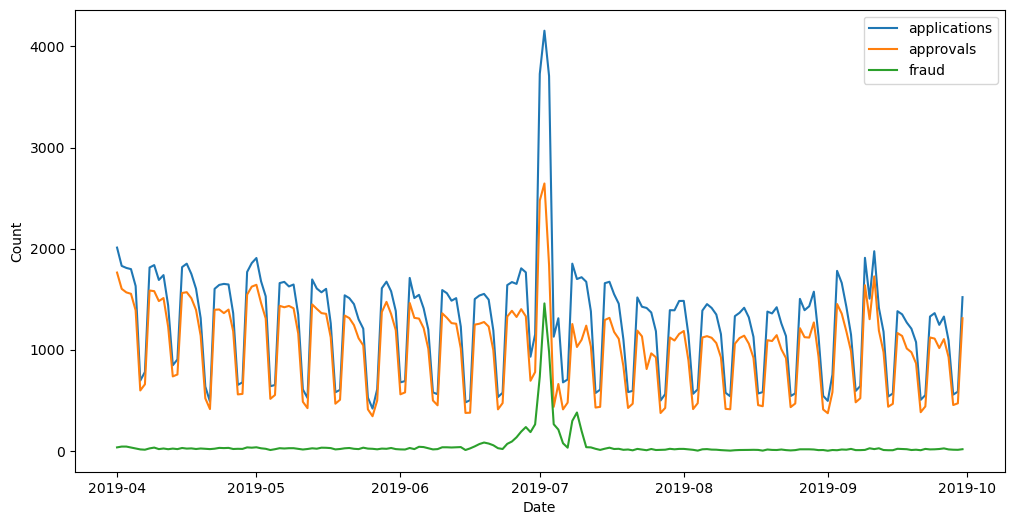

In [52]:
fraud_for_imputation['application_date'] = pd.to_datetime(fraud_for_imputation['application_date'])
fraud_for_imputation['first_transaction_date'] = pd.to_datetime(fraud['first_transaction_date'])
fraud_for_imputation['application_id'] = fraud['application_id']
fraud_for_imputation['application_date'] = fraud_for_imputation['application_date'].dt.date
daily_data = fraud_for_imputation.groupby('application_date').agg({
    'application_id': 'count',
    'final_decision': lambda x: (x == 'APPROVED').sum(),
    'is_fraud': 'sum'
}).reset_index()

daily_data.columns = ['date', 'applications', 'approvals', 'fraud']

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(daily_data['date'], daily_data['applications'], label='applications')
plt.plot(daily_data['date'], daily_data['approvals'], label='approvals')
plt.plot(daily_data['date'], daily_data['fraud'], label='fraud')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

In [53]:
daily_data.head()

date  applications  approvals  fraud
0  2019-04-01          2010       1763     34
1  2019-04-02          1829       1602     42
2  2019-04-03          1809       1567     42
3  2019-04-04          1797       1553     33
4  2019-04-05          1630       1390     25

In [54]:
daily_data['fraud_rate'] = daily_data['fraud'] / daily_data['applications']
daily_data['approval_rate'] = daily_data['approvals'] / daily_data['applications']
daily_data['app_rate'] = daily_data['applications'] / daily_data['applications'].sum()

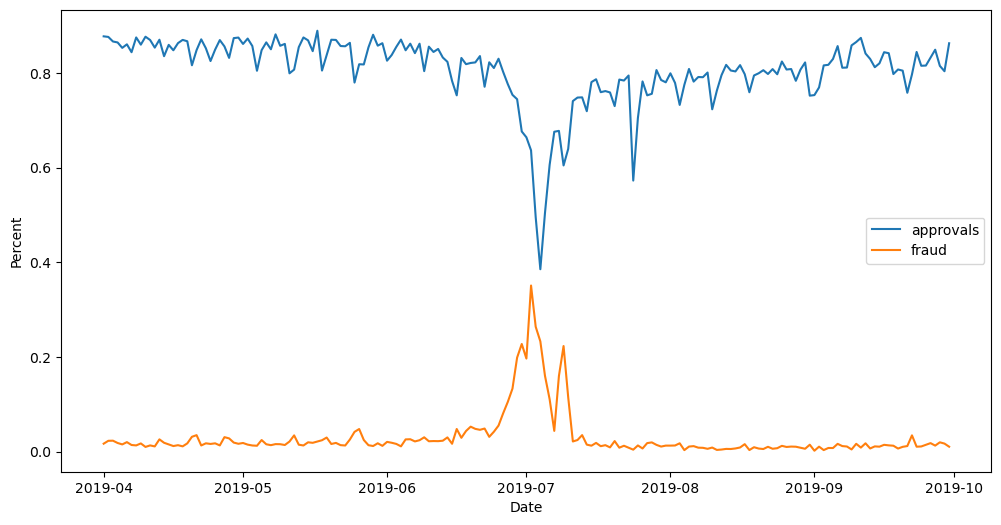

In [55]:
plt.figure(figsize=(12, 6))
plt.plot(daily_data['date'], daily_data['approval_rate'], label='approvals')
plt.plot(daily_data['date'], daily_data['fraud_rate'], label='fraud')
plt.xlabel('Date')
plt.ylabel('Percent')
plt.legend()
plt.show()

In [56]:
daily_data['avg_fraud_score'] = fraud.groupby('application_date')['fraud_score'].mean().reset_index()['fraud_score']

In [57]:
daily_data['avg_credit_score'] = fraud.groupby('application_date')['credit_score'].mean().reset_index()['credit_score']

In [58]:
daily_data.head()

date  applications  approvals  fraud  fraud_rate  approval_rate  \
0  2019-04-01          2010       1763     34    0.016915       0.877114   
1  2019-04-02          1829       1602     42    0.022963       0.875888   
2  2019-04-03          1809       1567     42    0.023217       0.866224   
3  2019-04-04          1797       1553     33    0.018364       0.864218   
4  2019-04-05          1630       1390     25    0.015337       0.852761   

   app_rate  avg_fraud_score  avg_credit_score  
0  0.008596       142.444087          7.483347  
1  0.007822       154.957326          7.358189  
2  0.007736       172.173679          7.393797  
3  0.007685       156.236497          7.277228  
4  0.006971       153.687313          7.339334

In [59]:
import matplotlib.pyplot as plt

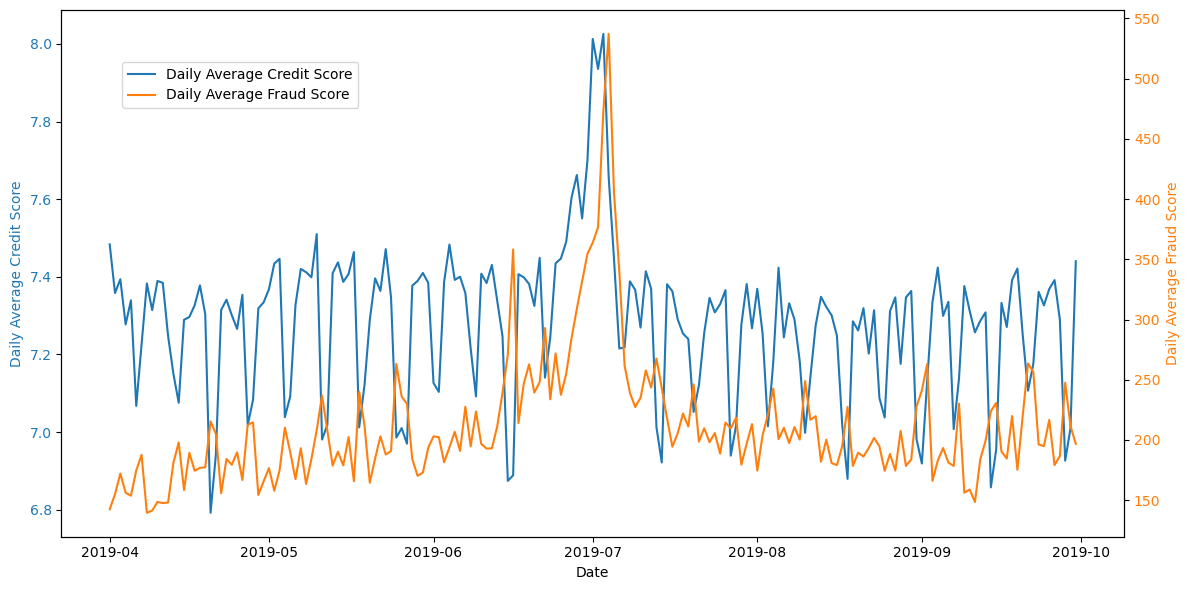

In [60]:
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Daily Average Credit Score', color=color)
ax1.plot(daily_data['date'], daily_data['avg_credit_score'], color=color, label='Daily Average Credit Score')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Daily Average Fraud Score', color=color)
ax2.plot(daily_data['date'], daily_data['avg_fraud_score'], color=color, label='Daily Average Fraud Score')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()


Anomalies happened around 6/25 - 7/4 across metrics 

In [61]:
anomaly_period_start = '2019-06-25'
anomaly_period_end = '2019-07-04'

In [62]:
normal_period_data = fraud[((fraud['application_date'] < anomaly_period_start)) | ((fraud['application_date'] > anomaly_period_end))]
anomaly_period_data = fraud[(fraud['application_date'] >= anomaly_period_start) & (fraud['application_date'] <= anomaly_period_end)]

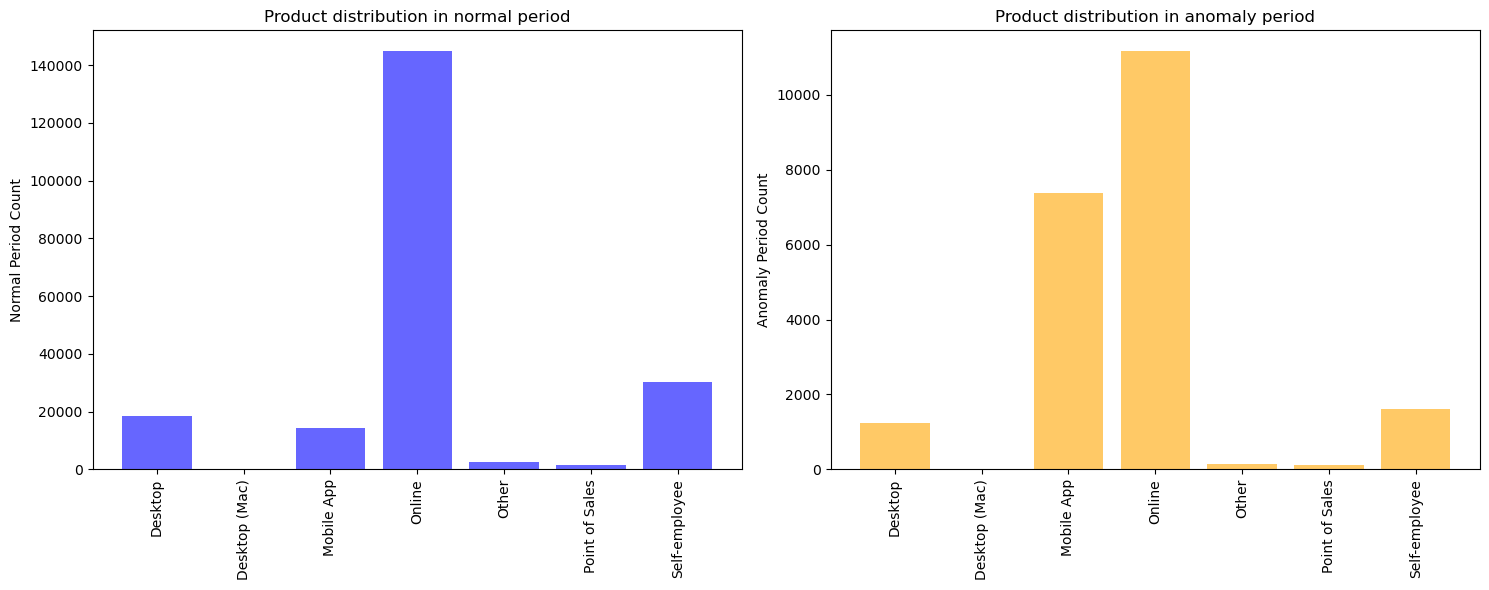

In [63]:
normal_period_distribution = normal_period_data['product'].value_counts().sort_index()
anomaly_period_distribution = anomaly_period_data['product'].value_counts().sort_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharey=False)

ax1.bar(normal_period_distribution.index, normal_period_distribution.values, color='blue', alpha=0.6)
ax1.set_title('Product distribution in normal period')
ax1.set_ylabel('Normal Period Count')
ax1.set_xticks(range(len(normal_period_distribution.index)))
ax1.set_xticklabels(normal_period_distribution.index, rotation=90)

ax2.bar(anomaly_period_distribution.index, anomaly_period_distribution.values, color='orange', alpha=0.6)
ax2.set_title('Product distribution in anomaly period')
ax2.set_ylabel('Anomaly Period Count')
ax2.set_xticks(range(len(anomaly_period_distribution.index)))
ax2.set_xticklabels(anomaly_period_distribution.index, rotation=90)

plt.tight_layout()
plt.show()

In [64]:
normal_period_state_counts = normal_period_data['state'].value_counts().sort_index()
anomaly_period_state_counts = anomaly_period_data['state'].value_counts().sort_index()

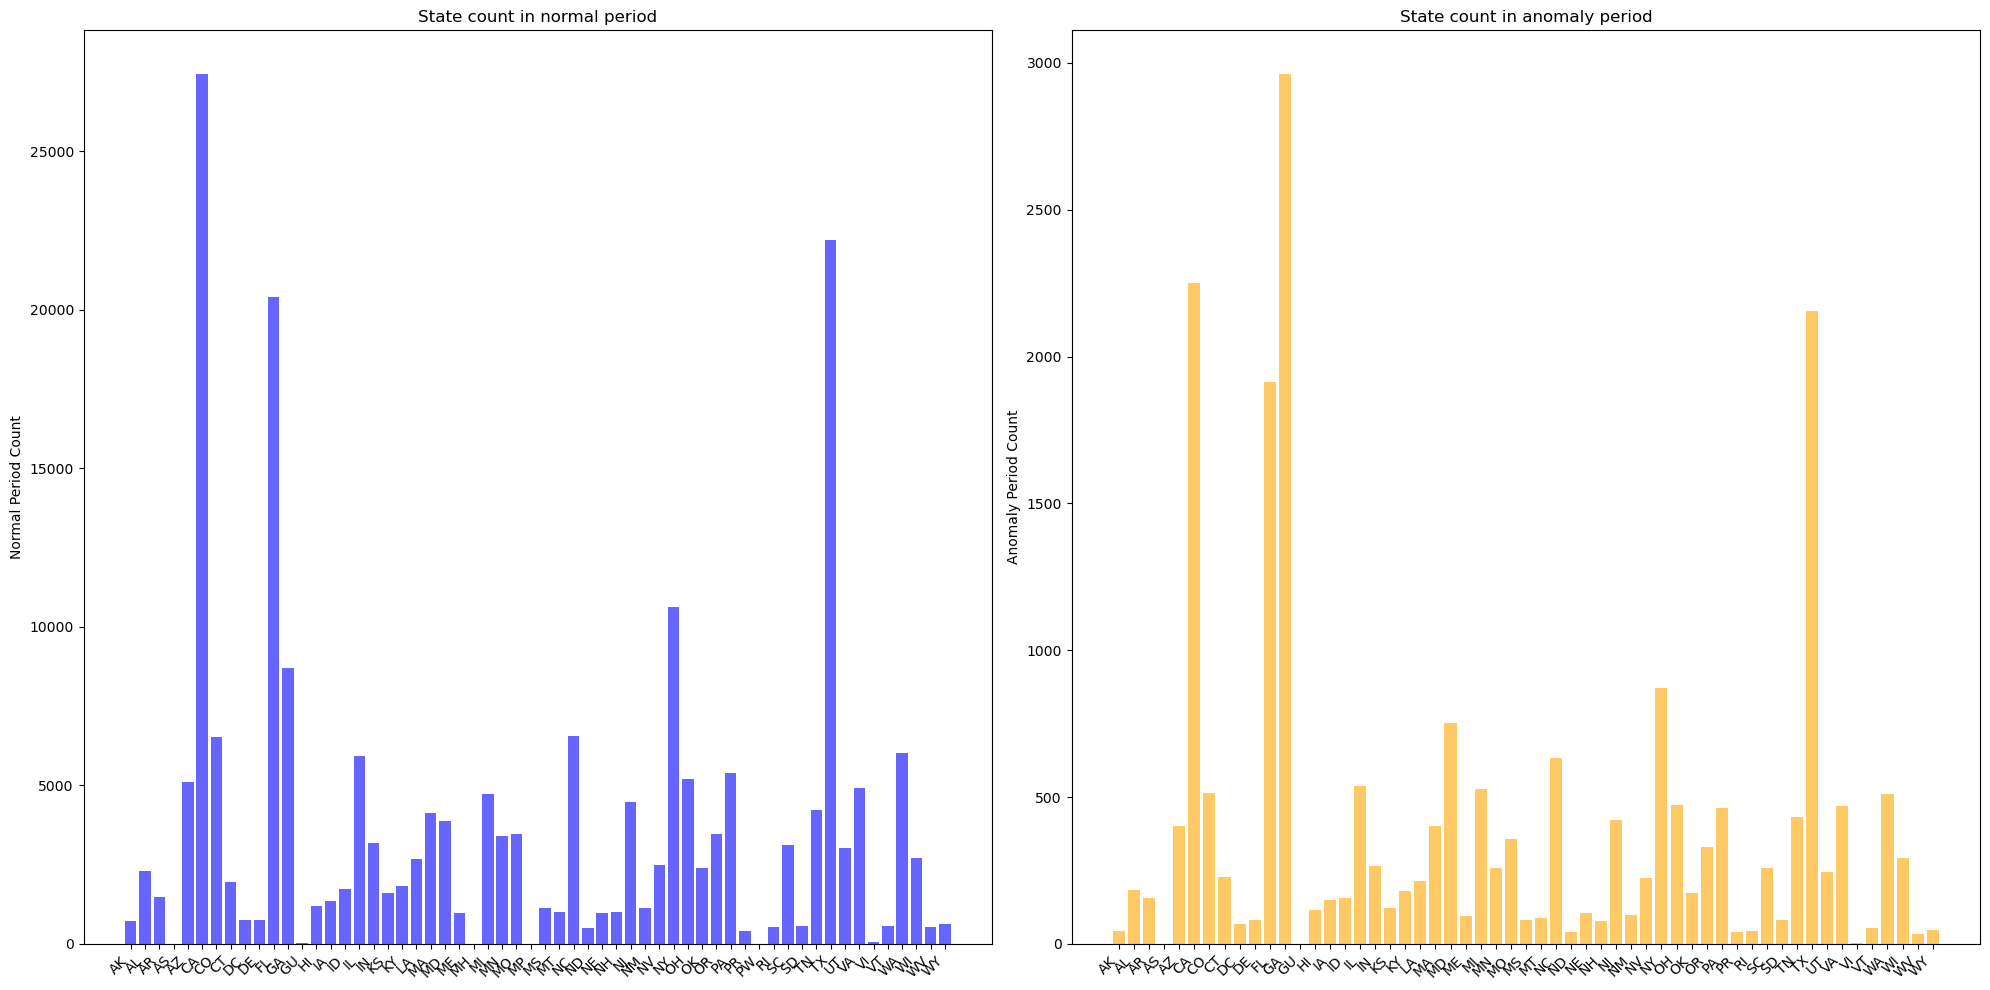

In [65]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), sharey=False)

ax1.bar(normal_period_state_counts.index, normal_period_state_counts.values, color='blue', alpha=0.6)
ax1.set_title('State count in normal period')
ax1.set_ylabel('Normal Period Count')
ax1.set_xticks(range(len(normal_period_state_counts.index)))
ax1.set_xticklabels(normal_period_state_counts.index, rotation=45, ha='right')

ax2.bar(anomaly_period_state_counts.index, anomaly_period_state_counts.values, color='orange', alpha=0.6)
ax2.set_title('State count in anomaly period')
ax2.set_ylabel('Anomaly Period Count')
ax2.set_xticks(range(len(anomaly_period_state_counts.index)))
ax2.set_xticklabels(anomaly_period_state_counts.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

Potential Root Causes:

Targeted Fraud Campaign: The spike in fraud rates could be due to a targeted fraud campaign. Fraudsters might have exploited vulnerabilities in the system or targeted specific products or regions.

## Fraud Detection Algorithm With Random Forest

Isolation Forest is specifically designed to identify anomalies, which are typically sparse and different from the majority of the data. In fraud detection, fraudulent transactions are outliers compared to legitimate transactions, making this algorithm a good fit. Additionally, the algorithm works in an unsupervised manner, making it suitable for scenarios where labeled data is scarce or unavailable. It can handle multiple features simultaneously, detecting complex patterns of fraud that might not be apparent when looking at individual features alone. Isolation Forest is also efficient and scalable, providing fast training and prediction times, which is essential for real-time fraud detection. It is robust to high-dimensional data and does not assume any specific data distribution, making it versatile across various fraud detection contexts. The algorithm assigns clear anomaly scores to data points, aiding in setting thresholds for flagging fraud and improving decision-making.

In [66]:
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
fraud_for_imputation.head()

product      industry application_date final_decision  is_fraud  \
0  Desktop  Retail Trade       2019-09-07       APPROVED     False   
1  Desktop      Services       2019-09-30       APPROVED     False   
2  Desktop      Services       2019-08-12       DECLINED     False   
3  Desktop  Retail Trade       2019-09-26       APPROVED     False   
4  Desktop      Services       2019-08-24       APPROVED     False   

   credit_score  fraud_score  first_transaction_date_numeric  \
0          5.50       40.050                         18150.0   
1          9.38        4.800                         18169.0   
2          9.25       78.500                             NaN   
3          8.53        4.925                             NaN   
4          8.25        5.200                         18148.0   

  first_transaction_date    application_id  
0             2019-09-11  2454736213109889  
1             2019-09-30  2406652813647864  
2                    NaT  2491009212283403  
3                    NaT  2349701212241921  
4             2019-09-09  2380050314918284

In [68]:
fraud_copy = fraud_for_imputation.copy()

In [69]:
fraud_copy['application_date'] = pd.to_datetime(fraud_copy['application_date'])
fraud_copy['is_fraud_numeric'] = fraud_copy['is_fraud'].astype(int)
fraud_copy['is_approved'] = fraud_copy['final_decision'].apply(lambda x: 1 if x == "APPROVED" else 0)
fraud_copy.head()

product      industry application_date final_decision  is_fraud  \
0  Desktop  Retail Trade       2019-09-07       APPROVED     False   
1  Desktop      Services       2019-09-30       APPROVED     False   
2  Desktop      Services       2019-08-12       DECLINED     False   
3  Desktop  Retail Trade       2019-09-26       APPROVED     False   
4  Desktop      Services       2019-08-24       APPROVED     False   

   credit_score  fraud_score  first_transaction_date_numeric  \
0          5.50       40.050                         18150.0   
1          9.38        4.800                         18169.0   
2          9.25       78.500                             NaN   
3          8.53        4.925                             NaN   
4          8.25        5.200                         18148.0   

  first_transaction_date    application_id  is_fraud_numeric  is_approved  
0             2019-09-11  2454736213109889                 0            1  
1             2019-09-30  2406652813647864                 0            1  
2                    NaT  2491009212283403                 0            0  
3                    NaT  2349701212241921                 0            1  
4             2019-09-09  2380050314918284                 0            1

In [70]:
fraud_copy['application_num'] = fraud_copy['application_date'].apply(lambda x: 1)
fraud_copy.head()

product      industry application_date final_decision  is_fraud  \
0  Desktop  Retail Trade       2019-09-07       APPROVED     False   
1  Desktop      Services       2019-09-30       APPROVED     False   
2  Desktop      Services       2019-08-12       DECLINED     False   
3  Desktop  Retail Trade       2019-09-26       APPROVED     False   
4  Desktop      Services       2019-08-24       APPROVED     False   

   credit_score  fraud_score  first_transaction_date_numeric  \
0          5.50       40.050                         18150.0   
1          9.38        4.800                         18169.0   
2          9.25       78.500                             NaN   
3          8.53        4.925                             NaN   
4          8.25        5.200                         18148.0   

  first_transaction_date    application_id  is_fraud_numeric  is_approved  \
0             2019-09-11  2454736213109889                 0            1   
1             2019-09-30  2406652813647864                 0            1   
2                    NaT  2491009212283403                 0            0   
3                    NaT  2349701212241921                 0            1   
4             2019-09-09  2380050314918284                 0            1   

   application_num  
0                1  
1                1  
2                1  
3                1  
4                1

In [71]:
daily_data = fraud_copy.groupby('application_date').agg({
    'application_id': 'count',
    'final_decision': lambda x: (x == 'APPROVED').sum(),
    'is_fraud': 'mean'
}).reset_index()
daily_data.head()

application_date  application_id  final_decision  is_fraud
0       2019-04-01            2010            1763  0.016915
1       2019-04-02            1829            1602  0.022963
2       2019-04-03            1809            1567  0.023217
3       2019-04-04            1797            1553  0.018364
4       2019-04-05            1630            1390  0.015337

/Users/yuhetian/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


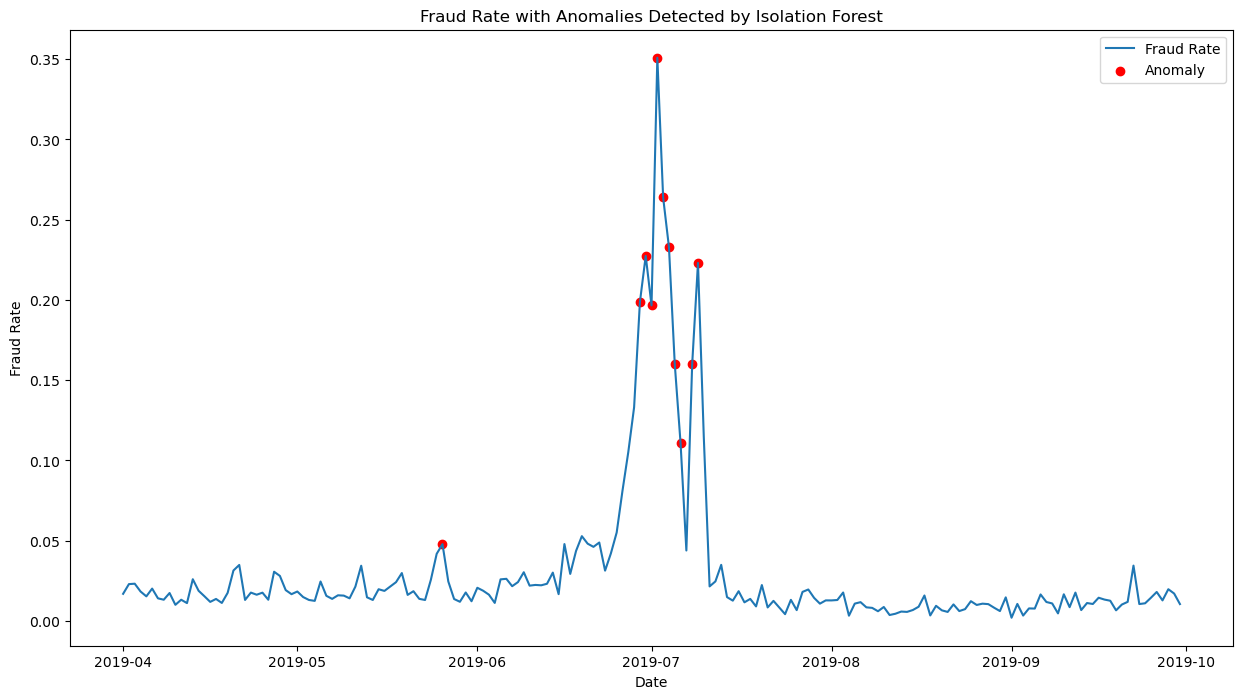

Number of anomalies detected: 11
   application_date  application_id  final_decision  is_fraud  anomaly_score  \
55       2019-05-26             418             342  0.047847             -1   
89       2019-06-29             931             693  0.198711             -1   
90       2019-06-30            1152             779  0.227431             -1   
91       2019-07-01            3728            2475  0.196620             -1   
92       2019-07-02            4155            2644  0.350903             -1   
93       2019-07-03            3707            1836  0.263825             -1   
94       2019-07-04            1129             435  0.232950             -1   
95       2019-07-05            1311             661  0.160183             -1   
96       2019-07-06             677             410  0.110783             -1   
98       2019-07-08            1851            1254  0.159914             -1   
99       2019-07-09            1699            1027  0.223072             -1   

    an

In [72]:
features = ['is_fraud', 'application_id', 'final_decision']  # Add other features if relevant

# Train the Isolation Forest model
model = IsolationForest(contamination=0.06, random_state=42)
daily_data['anomaly_score'] = model.fit_predict(daily_data[features])

# -1 for anomalies, 1 for normal points
daily_data['anomaly'] = daily_data['anomaly_score'].apply(lambda x: 1 if x == -1 else 0)

# Plot the fraud rate with anomalies highlighted
plt.figure(figsize=(15, 8))
plt.plot(daily_data['application_date'], daily_data['is_fraud'], label='Fraud Rate')
plt.scatter(daily_data[daily_data['anomaly'] == 1]['application_date'], 
            daily_data[daily_data['anomaly'] == 1]['is_fraud'], 
            color='red', label='Anomaly')
plt.title('Fraud Rate with Anomalies Detected by Isolation Forest')
plt.xlabel('Date')
plt.ylabel('Fraud Rate')
plt.legend()
plt.show()

# Display the anomalies
anomalies = daily_data[daily_data['anomaly'] == 1]
print("Number of anomalies detected:", anomalies.shape[0])
print(anomalies)

# Part 2 Fraud Detection W/ and W/O Fraudkiller

In part 2 of our work, we will explore whether embedding the Fraudkiller into our fraud detection algorithms will prevent losses and bring extra profits to the firm.

## Feature Engineering


1. Feature Creation:

IPAddressLocCity_is_null: Indicates if the IPAddressLocCity is null.
Extracted hour, day_of_week, and week_of_year from the opendate.

2. Data Transformation:

Removed the original opendate column as it's been transformed into new features.

3. Encoding:

One-hot encoded categorical features such as AreaCode, DeviceBrowserType, IpAddressLocCity, and IpAddressLocCountry.

4. Scaling:

Standardized numerical features to have a mean of 0 and a standard deviation of 1.

In [73]:
from sklearn.impute import SimpleImputer

In [74]:
# read in p2 dataset
p2 = pd.read_excel('p2_dataset.xlsx')
p2.head()

ID  is_fraud            opendate  AreaCode  EAScore  IdentityRank  \
0   134457         1 2018-09-03 06:23:54       973      NaN         425.0   
1  6360592         0 2018-09-28 10:06:27       310    930.0         652.0   
2   462987         0 2018-09-02 08:18:07       502    704.0         683.0   
3   309372         0 2018-10-01 06:40:22       518    113.0         477.0   
4   397009         1 2018-07-12 23:23:39       713      NaN         587.0   

  DeviceBrowserType IpAddressLocCity IpAddressLocCountry  IsValid  \
0           TRIDENT              NaN       UNITED STATES     True   
1           TRIDENT           AUSTIN       UNITED STATES     True   
2            CHROME       LOUISVILLE       UNITED STATES     True   
3           FIREFOX      SCHENECTADY       UNITED STATES     True   
4           FIREFOX      LOS ANGELES       UNITED STATES     True   

   IsConnected  PersonalDevice  Reputation Level  ReceivingMail Type  \
0          1.0            True                 1            1.0    L   
1          1.0            True                 1            1.0    F   
2          1.0            True                 1            NaN    M   
3          1.0            True                 1            NaN    L   
4          NaN            True                 1            NaN    N   

   Volume Score  Result Number  EmailDays  
0             1              2         95  
1             1              1        116  
2             1              1        116  
3             1              1       1513  
4             1              1          0

In [75]:
p2.shape

(2775, 18)

In [76]:
# Feature Creation

# 1. IPAddressLocCity_is_null
p2['IPAddressLocCity_is_null'] = p2['IpAddressLocCity'].isnull().astype(int)

# 2. Extract features from opendate
p2['opendate'] = pd.to_datetime(p2['opendate'])
p2['hour'] = p2['opendate'].dt.hour
p2['day_of_week'] = p2['opendate'].dt.dayofweek
p2['week_of_year'] = p2['opendate'].dt.isocalendar().week.astype(int)

In [77]:
# Data Transformation

# Drop unnecessary columns
p2.drop(['opendate', 'ID'], axis=1, inplace=True)

numerical_cols = p2.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = p2.select_dtypes(exclude=[np.number]).columns.tolist()

# Handle missing values for numerical columns
imputer_num = SimpleImputer(strategy='mean')
p2[numerical_cols] = imputer_num.fit_transform(p2[numerical_cols])

# Handle missing values for categorical columns
imputer_cat = SimpleImputer(strategy='most_frequent')
p2[categorical_cols] = imputer_cat.fit_transform(p2[categorical_cols])

# Encoding

# One-hot encode categorical variables
categorical_features = ['AreaCode', 'DeviceBrowserType', 'IpAddressLocCity', 'IpAddressLocCountry']
p2 = pd.get_dummies(p2, columns=categorical_features, drop_first=True)

In [78]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns

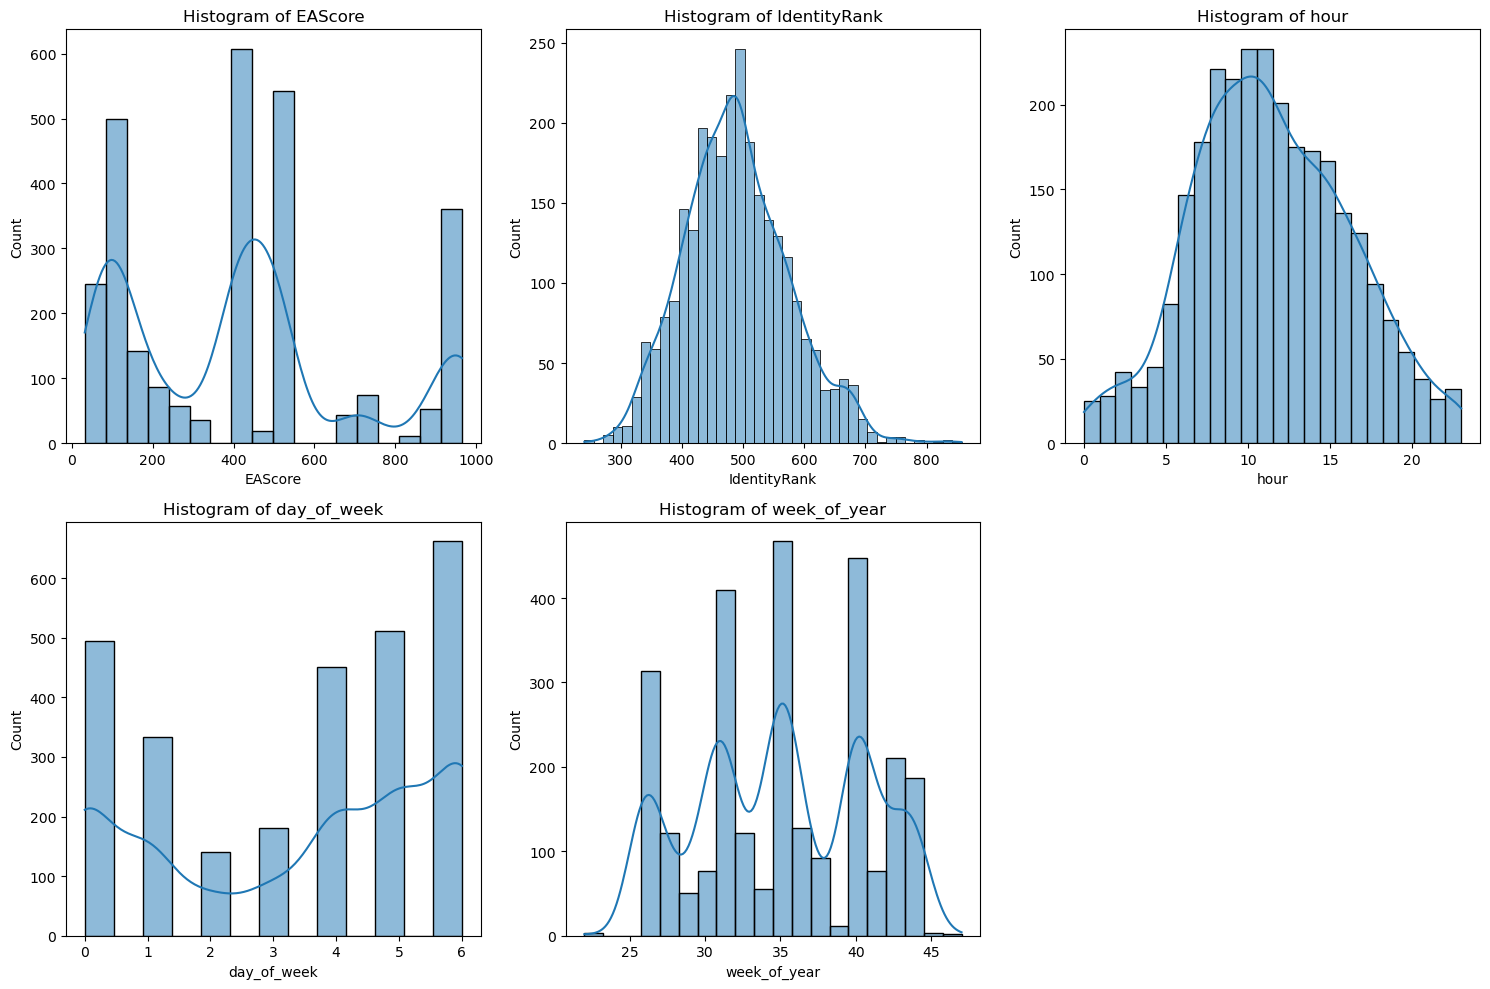

In [79]:
numerical_features = ['EAScore', 'IdentityRank', 'hour', 'day_of_week', 'week_of_year']

# Plot histograms for each numerical feature before scaling
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i+1)
    sns.histplot(p2[feature], kde=True)
    plt.title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()

In [80]:
# Standardize numerical features
scaler = StandardScaler()
p2[numerical_features] = scaler.fit_transform(p2[numerical_features])

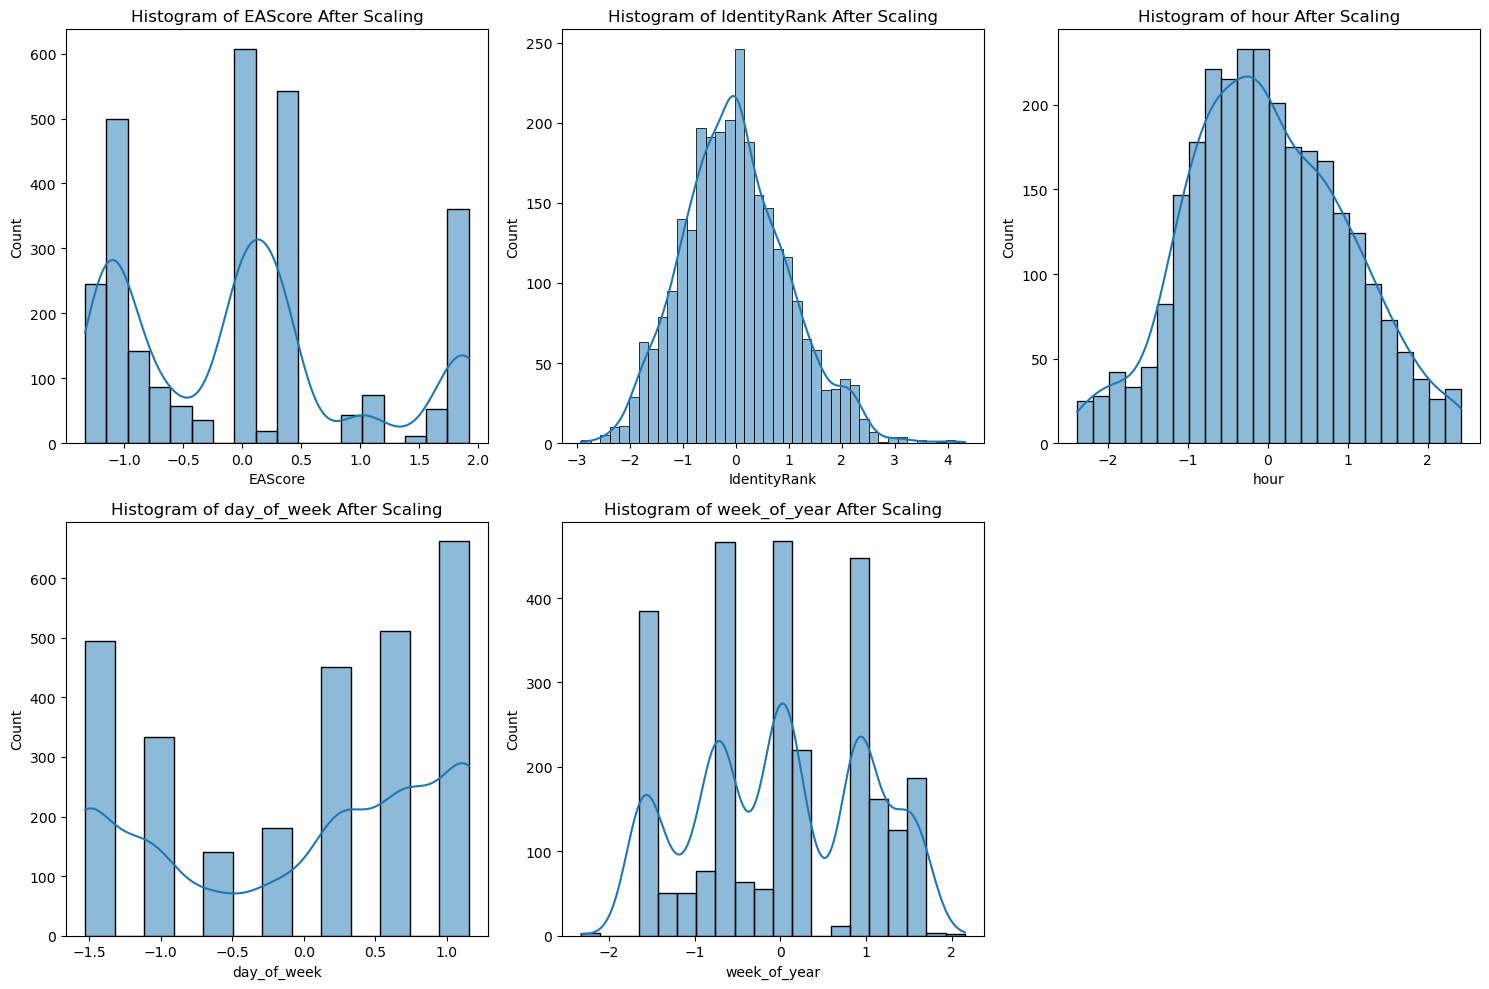

In [81]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i+1)
    sns.histplot(p2[feature], kde=True)
    plt.title(f'Histogram of {feature} After Scaling')
plt.tight_layout()
plt.show()

## Model Selection
The model selection process ensures that the final model not only achieves high predictive accuracy but also aligns with business objectives, such as minimizing losses from fraudulent approvals and maximizing revenue from valid approvals. We evaluate and optimize machine learning models to predict fraudulent activities. The process includes:

1. Model Comparison: Different models are trained and evaluated using performance metrics such as accuracy, precision, recall, and F1-score.
2. Hyperparameter Optimization: Grid Search or similar methods are employed to tune model parameters for better performance.
3. Profit Optimization: Thresholds are optimized to maximize profit while balancing fraud detection and approval rates.

In [82]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

In [83]:
p2.head()

is_fraud   EAScore  IdentityRank IsValid  IsConnected PersonalDevice  \
0       1.0  0.000000     -0.754471    True     1.000000           True   
1       0.0  1.799414      1.913780    True     1.000000           True   
2       0.0  1.011454      2.278167    True     1.000000           True   
3       0.0 -1.049099     -0.143242    True     1.000000           True   
4       1.0  0.000000      1.149744    True     0.999564           True   

   Reputation Level  ReceivingMail Type  Volume Score  ...  \
0               1.0       1.000000    L           1.0  ...   
1               1.0       1.000000    F           1.0  ...   
2               1.0       0.903509    M           1.0  ...   
3               1.0       0.903509    L           1.0  ...   
4               1.0       0.903509    N           1.0  ...   

   IpAddressLocCity_WYLIE  IpAddressLocCity_XENIA  IpAddressLocCity_YAKIMA  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       0                        0   

   IpAddressLocCity_YANKTON  IpAddressLocCity_YORBA LINDA  \
0                         0                             0   
1                         0                             0   
2                         0                             0   
3                         0                             0   
4                         0                             0   

   IpAddressLocCity_YORK  IpAddressLocCity_YOUNGSTOWN  \
0                      0                            0   
1                      0                            0   
2                      0                            0   
3                      0                            0   
4                      0                            0   

   IpAddressLocCity_ZACHARY  IpAddressLocCountry_NIGERIA  \
0                         0                            0   
1                         0                            0   
2                         0                            0   
3                         0                            0   
4                         0                            0   

   IpAddressLocCountry_UNITED STATES  
0                                  1  
1                                  1  
2                                  1  
3                                  1  
4                                  1  

[5 rows x 1299 columns]

### Models without Fraud killer

In [84]:
fraudkiller_features = ['IsValid', 'IsConnected', 'PersonalDevice', 'Reputation Level', 'ReceivingMail', 'Type', 'Volume Score', 'Result Number', 'EmailDays']
no_killer = p2.copy().drop(columns=fraudkiller_features)

In [85]:
X_no_killer = no_killer.drop(['is_fraud'], axis=1)
y_no_killer = no_killer['is_fraud']

# Split the data into training and testing sets
X_train_no_killer, X_test_no_killer, y_train_no_killer, y_test_no_killer = train_test_split(X_no_killer, y_no_killer, test_size=0.2, random_state=42)

In [86]:
# Logistic Regression
log_reg_no_killer = LogisticRegression(max_iter=1000)
log_reg_no_killer.fit(X_train_no_killer, y_train_no_killer)
y_pred_log_reg_no_killer = log_reg_no_killer.predict(X_test_no_killer)
print("Logistic Regression (no_killer):")
print(classification_report(y_test_no_killer, y_pred_log_reg_no_killer))

Logistic Regression (no_killer):
              precision    recall  f1-score   support

         0.0       0.80      0.75      0.77       305
         1.0       0.72      0.77      0.74       250

    accuracy                           0.76       555
   macro avg       0.76      0.76      0.76       555
weighted avg       0.76      0.76      0.76       555



In [87]:
# Random Forest Classifier
rf_no_killer = RandomForestClassifier(random_state=42)
rf_no_killer.fit(X_train_no_killer, y_train_no_killer)
y_pred_rf_no_killer = rf_no_killer.predict(X_test_no_killer)
print("Random Forest (no_killer):")
print(classification_report(y_test_no_killer, y_pred_rf_no_killer))

Random Forest (no_killer):
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93       305
         1.0       0.92      0.92      0.92       250

    accuracy                           0.93       555
   macro avg       0.93      0.93      0.93       555
weighted avg       0.93      0.93      0.93       555



In [88]:
# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 400],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_rf_no_killer = GridSearchCV(estimator=rf_no_killer, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2)
grid_search_rf_no_killer.fit(X_train_no_killer, y_train_no_killer)
best_rf_no_killer = grid_search_rf_no_killer.best_estimator_
y_pred_best_rf_no_killer = best_rf_no_killer.predict(X_test_no_killer)
print("Best Random Forest (no_killer):")
print(classification_report(y_test_no_killer, y_pred_best_rf_no_killer))

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Random Forest (no_killer):
              precision    recall  f1-score   support

         0.0       0.92      0.82      0.86       305
         1.0       0.80      0.91      0.85       250

    accuracy                           0.86       555
   macro avg       0.86      0.86      0.86       555
weighted avg       0.86      0.86      0.86       555



In [89]:
# XGBoost Classifier
xgb_no_killer = XGBClassifier(random_state=42, use_label_encoder=False)
xgb_no_killer.fit(X_train_no_killer, y_train_no_killer)
y_pred_xgb_no_killer = xgb_no_killer.predict(X_test_no_killer)
print("XGBoost (no_killer):")
print(classification_report(y_test_no_killer, y_pred_xgb_no_killer))

/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:54:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost (no_killer):
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97       305
         1.0       0.96      0.97      0.97       250

    accuracy                           0.97       555
   macro avg       0.97      0.97      0.97       555
weighted avg       0.97      0.97      0.97       555



In [90]:
# Hyperparameter tuning for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 400],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
}
grid_search_xgb_no_killer = GridSearchCV(estimator=xgb_no_killer, param_grid=param_grid_xgb, cv=3, n_jobs=-1, verbose=2)
grid_search_xgb_no_killer.fit(X_train_no_killer, y_train_no_killer)
best_xgb_no_killer = grid_search_xgb_no_killer.best_estimator_
y_pred_best_xgb_no_killer = best_xgb_no_killer.predict(X_test_no_killer)
print("Best XGBoost (no_killer):")
print(classification_report(y_test_no_killer, y_pred_best_xgb_no_killer))

Fitting 3 folds for each of 81 candidates, totalling 243 fits


/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:54:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:54:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:54:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:54:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarni

/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:54:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:54:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:54:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:54:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarni

/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:55:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:55:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:55:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:55:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarni

/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:55:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:55:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:55:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:55:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarni

/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:55:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:55:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:55:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:55:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarni

/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:55:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:55:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:55:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:56:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarni

/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:56:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:56:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:56:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:56:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarni

/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:56:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:56:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:56:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:56:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarni

Best XGBoost (no_killer):
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       305
         1.0       0.97      0.98      0.97       250

    accuracy                           0.98       555
   macro avg       0.98      0.98      0.98       555
weighted avg       0.98      0.98      0.98       555



In [91]:
print("Best XGBoost (no_killer):")
print(classification_report(y_test_no_killer, y_pred_best_xgb_no_killer))

Best XGBoost (no_killer):
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       305
         1.0       0.97      0.98      0.97       250

    accuracy                           0.98       555
   macro avg       0.98      0.98      0.98       555
weighted avg       0.98      0.98      0.98       555



In [92]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

Text(1180.4281045751634, 0.5, 'Actual')

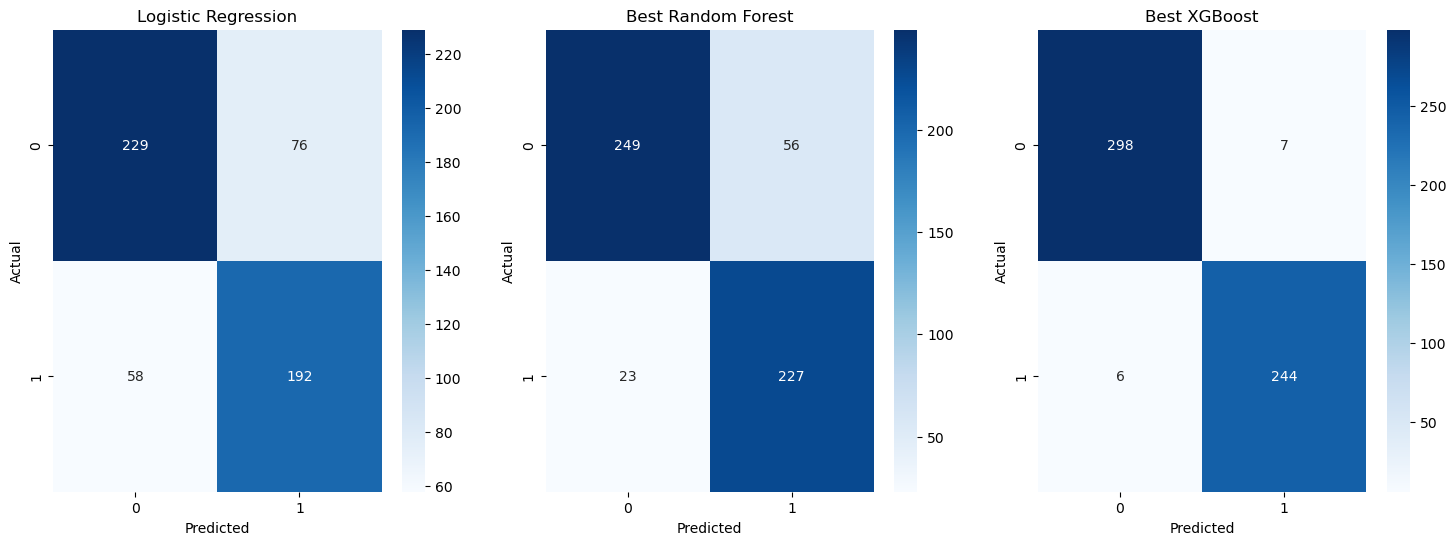

In [93]:
# Plotting Confusion Matrices for Visual Comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Confusion Matrix for Logistic Regression
sns.heatmap(confusion_matrix(y_test_no_killer, y_pred_log_reg_no_killer), annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title('Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Confusion Matrix for Best Random Forest
sns.heatmap(confusion_matrix(y_test_no_killer, y_pred_best_rf_no_killer), annot=True, fmt='d', ax=axes[1], cmap='Blues')
axes[1].set_title('Best Random Forest')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

# Confusion Matrix for Best XGBoost
sns.heatmap(confusion_matrix(y_test_no_killer, y_pred_best_xgb_no_killer), annot=True, fmt='d', ax=axes[2], cmap='Blues')
axes[2].set_title('Best XGBoost')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

Conclusion:
1. XGBoost has the highest number of True Positives and True Negatives, and the lowest number of False Positives and False Negatives, indicating it is performing the best in terms of correctly identifying both classes.
2. The accuracy score of XGBoost is the highest at 98%, compared to Random Forest (90%) and Logistic Regression (81%).
3. The confusion matrix for XGBoost shows the least misclassifications, further supporting that XGBoost is the best model among the three.

Thus, based on these metrics, XGBoost appears to be the best performing model for this fraud detection task.

### Models With FraudKiller

In [94]:
killer = p2.copy()
categorical_features = ['IsValid', 'IsConnected', 'PersonalDevice', 'Reputation Level', 'ReceivingMail', 'Type']
killer = pd.get_dummies(killer, columns=categorical_features, drop_first=True)
killer.head()

is_fraud   EAScore  IdentityRank  Volume Score  Result Number  EmailDays  \
0       1.0  0.000000     -0.754471           1.0            2.0       95.0   
1       0.0  1.799414      1.913780           1.0            1.0      116.0   
2       0.0  1.011454      2.278167           1.0            1.0      116.0   
3       0.0 -1.049099     -0.143242           1.0            1.0     1513.0   
4       1.0  0.000000      1.149744           1.0            1.0        0.0   

   IPAddressLocCity_is_null      hour  day_of_week  week_of_year  ...  \
0                       1.0 -1.130061    -1.528433      0.183354  ...   
1                       0.0 -0.295929     0.258925      0.720448  ...   
2                       0.0 -0.712995     1.152605      0.004323  ...   
3                       0.0 -1.130061    -1.528433      0.899480  ...   
4                       0.0  2.415001    -0.187914     -1.248897  ...   

   IsConnected_1.0  Reputation Level_2.0  Reputation Level_3.0  \
0                1                     0                     0   
1                1                     0                     0   
2                1                     0                     0   
3                1                     0                     0   
4                0                     0                     0   

   ReceivingMail_0.9035087719298246  ReceivingMail_1.0  Type_F  Type_L  \
0                                 0                  1       0       1   
1                                 0                  1       1       0   
2                                 1                  0       0       0   
3                                 1                  0       0       1   
4                                 1                  0       0       0   

   Type_M  Type_N  Type_T  
0       0       0       0  
1       0       0       0  
2       1       0       0  
3       0       0       0  
4       0       1       0  

[5 rows x 1305 columns]

In [95]:
X = killer.drop(['is_fraud'], axis=1)
y = killer['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression:")
print(classification_report(y_test, y_pred_log_reg))
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))

Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.82      0.77      0.79       305
         1.0       0.74      0.79      0.76       250

    accuracy                           0.78       555
   macro avg       0.78      0.78      0.78       555
weighted avg       0.78      0.78      0.78       555

Accuracy: 0.7801801801801802


/Users/yuhetian/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [97]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest:
              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91       305
         1.0       0.91      0.87      0.89       250

    accuracy                           0.90       555
   macro avg       0.91      0.90      0.90       555
weighted avg       0.90      0.90      0.90       555

Accuracy: 0.9045045045045045


In [98]:
# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 400],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
print("Best Random Forest:")
print(classification_report(y_test, y_pred_best_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_best_rf))

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Random Forest:
              precision    recall  f1-score   support

         0.0       0.90      0.94      0.92       305
         1.0       0.92      0.87      0.89       250

    accuracy                           0.91       555
   macro avg       0.91      0.90      0.90       555
weighted avg       0.91      0.91      0.91       555

Accuracy: 0.9063063063063063


In [99]:
# XGBoost Classifier
xgb = XGBClassifier(random_state=42, use_label_encoder=False)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost:")
print(classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))

/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:57:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost:
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97       305
         1.0       0.96      0.96      0.96       250

    accuracy                           0.96       555
   macro avg       0.96      0.96      0.96       555
weighted avg       0.96      0.96      0.96       555

Accuracy: 0.963963963963964


In [100]:
# Hyperparameter tuning for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 400],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
}
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=3, n_jobs=-1, verbose=2)
grid_search_xgb.fit(X_train, y_train)
best_xgb = grid_search_xgb.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test)
print("Best XGBoost:")
print(classification_report(y_test, y_pred_best_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_best_xgb))

Fitting 3 folds for each of 81 candidates, totalling 243 fits


/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:57:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:57:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:57:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:57:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarni

/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:57:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:57:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:57:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:57:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarni

/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:57:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:57:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:57:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:57:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarni

/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:58:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:58:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:58:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:58:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarni

/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:58:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:58:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:58:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:58:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarni

/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:58:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:58:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:58:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:58:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarni

/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:58:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:58:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:58:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:58:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarni

/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:59:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:59:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:59:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/yuhetian/anaconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:59:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarni

Best XGBoost:
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       305
         1.0       0.96      0.96      0.96       250

    accuracy                           0.96       555
   macro avg       0.96      0.96      0.96       555
weighted avg       0.96      0.96      0.96       555

Accuracy: 0.963963963963964


In [101]:
print("Best XGBoost:")
print(classification_report(y_test, y_pred_best_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_best_xgb))

Best XGBoost:
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       305
         1.0       0.96      0.96      0.96       250

    accuracy                           0.96       555
   macro avg       0.96      0.96      0.96       555
weighted avg       0.96      0.96      0.96       555

Accuracy: 0.963963963963964


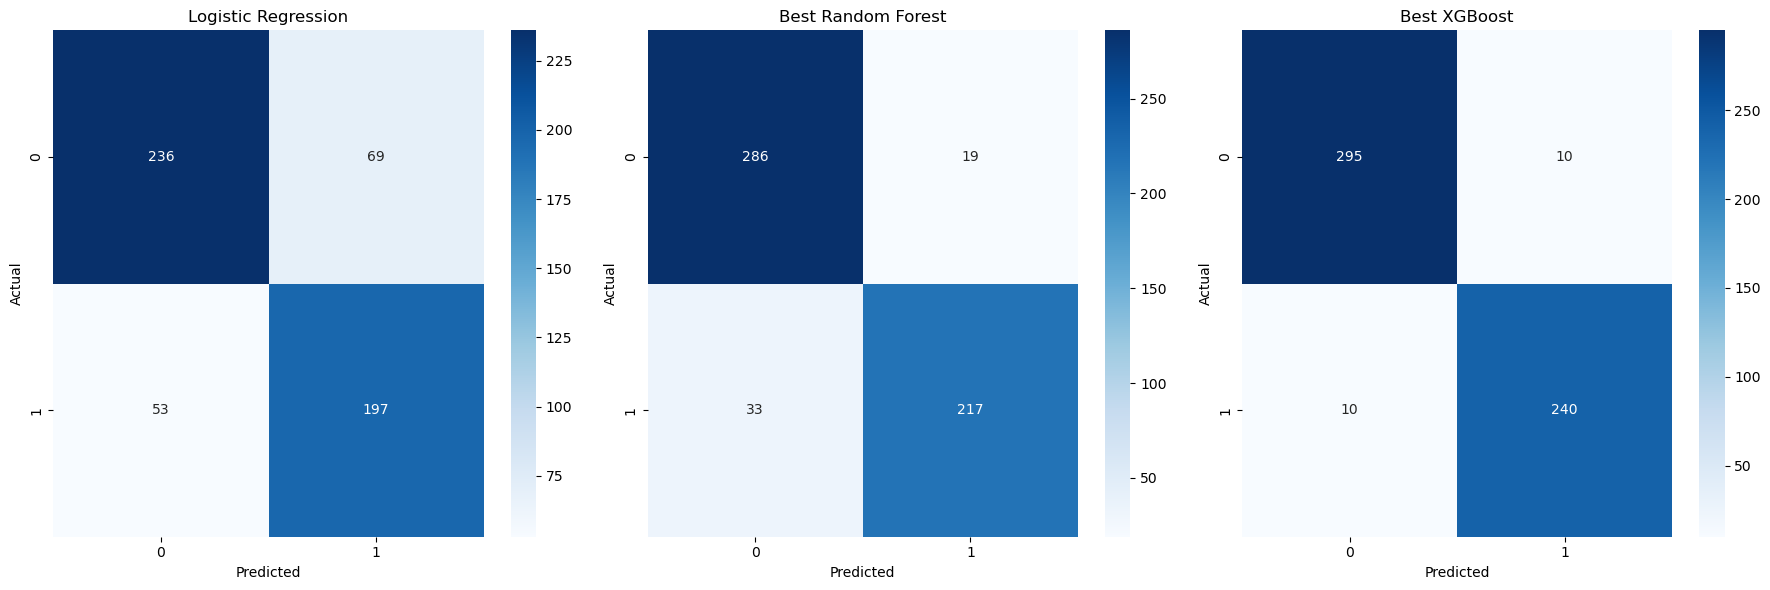

In [102]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Confusion Matrix for Logistic Regression
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title('Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Confusion Matrix for Best Random Forest
sns.heatmap(confusion_matrix(y_test, y_pred_best_rf), annot=True, fmt='d', ax=axes[1], cmap='Blues')
axes[1].set_title('Best Random Forest')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

# Confusion Matrix for Best XGBoost
sns.heatmap(confusion_matrix(y_test, y_pred_best_xgb), annot=True, fmt='d', ax=axes[2], cmap='Blues')
axes[2].set_title('Best XGBoost')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()

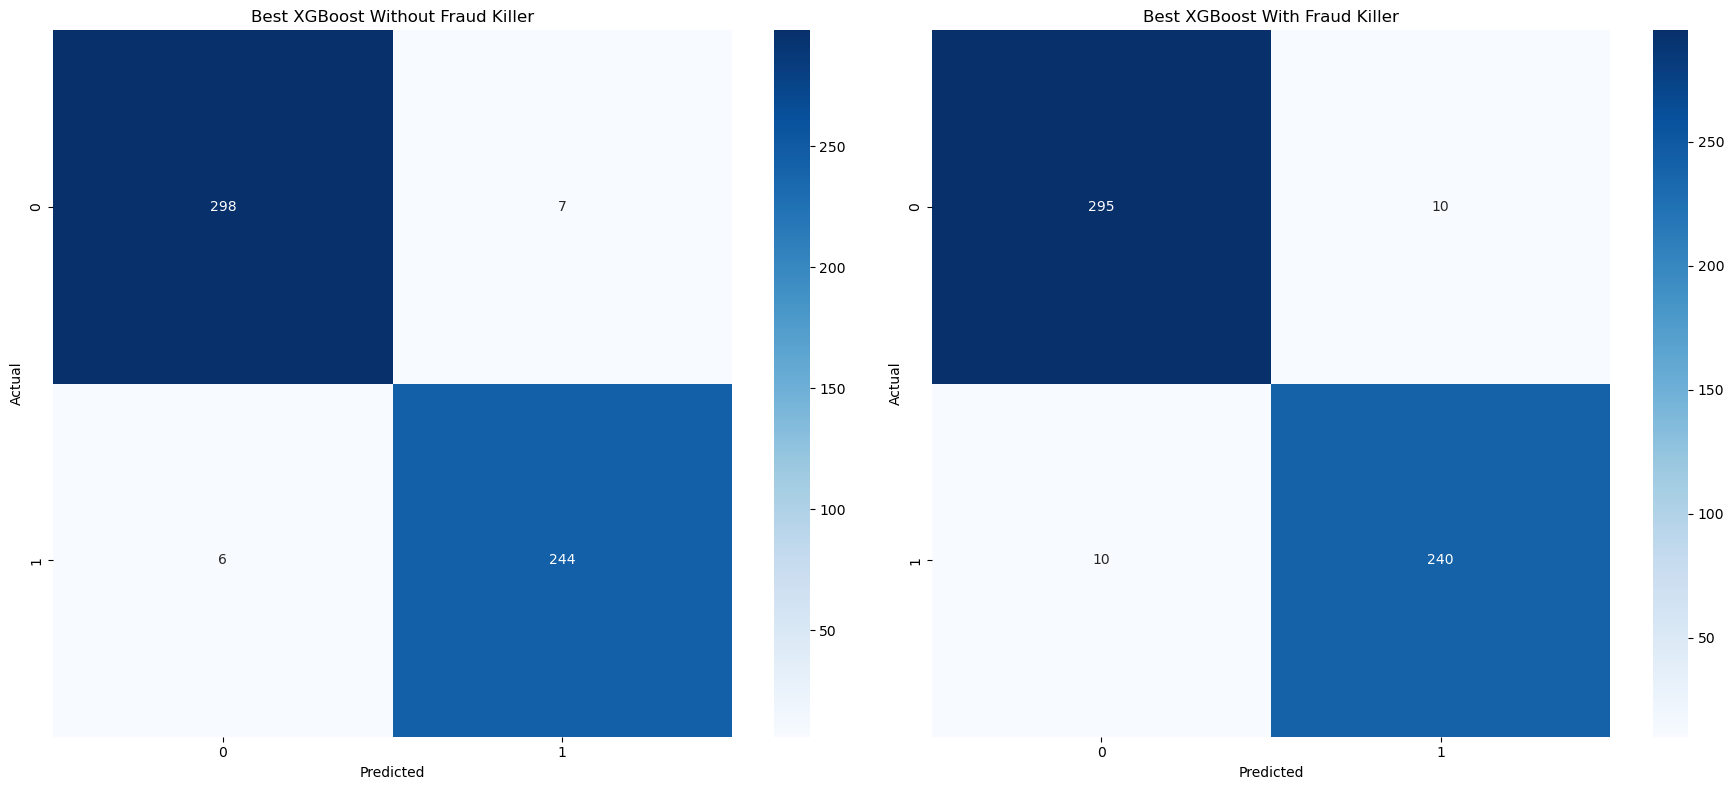

In [103]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

sns.heatmap(confusion_matrix(y_test_no_killer, y_pred_best_xgb_no_killer), annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title('Best XGBoost Without Fraud Killer')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test, y_pred_best_xgb), annot=True, fmt='d', ax=axes[1], cmap='Blues')
axes[1].set_title('Best XGBoost With Fraud Killer')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

## Optimization

In [104]:
from scipy.optimize import minimize

In [105]:
y_pred = best_xgb_no_killer.predict_proba(X_test_no_killer)[:, 1]
y_true = y_test_no_killer
approval = (y_pred >= 0.6)
y_pred

array([1.10080661e-02, 9.98417854e-01, 9.98943150e-01, 9.97023642e-01,
       7.92955995e-01, 1.90332942e-02, 9.97823119e-01, 9.98091996e-01,
       1.73537694e-02, 9.99618173e-01, 4.60024597e-03, 9.92595255e-01,
       9.88386154e-01, 7.54726589e-01, 1.09323254e-02, 1.48950398e-01,
       9.91864085e-01, 9.96614635e-01, 3.02994922e-02, 3.19509432e-02,
       9.76048946e-01, 1.46688567e-02, 5.62922619e-02, 1.34496926e-03,
       3.95200327e-02, 5.30042406e-03, 1.42088771e-01, 3.71381305e-02,
       5.48512395e-03, 9.98392522e-01, 2.74077896e-03, 9.21359193e-03,
       1.87571775e-02, 1.25266099e-02, 2.23883670e-02, 9.99214292e-01,
       2.36354885e-03, 9.98369277e-01, 5.37270494e-02, 2.52553262e-03,
       3.22158844e-03, 9.97602165e-01, 9.52884138e-01, 9.99253213e-01,
       6.13527698e-03, 3.16414051e-02, 3.30015272e-02, 9.99616623e-01,
       9.84772265e-01, 1.64076872e-02, 2.96855741e-03, 9.98889148e-01,
       3.28864530e-03, 9.78194177e-01, 6.05224669e-01, 2.65723318e-01,
      

In [106]:
def profit_function(thresholds, y_true, y_pred_proba, num_data):
    x1, x2 = thresholds
    approval = (y_pred_proba < x1)
    manual_review = (y_pred_proba >= x1) & (y_pred_proba < x2)
    decline = (y_pred_proba >= x2)

    count_approval_not_fraud = np.sum((approval) & (y_true == 0))
    count_manual_review_not_fraud = np.sum((manual_review) & (y_true == 0))
    count_approval_fraud = np.sum((approval) & (y_true == 1))
    count_manual_review_fraud = np.sum((manual_review) & (y_true == 1))


    revenue = 40 * 12 * count_approval_not_fraud + 40 * 0.3 * 12 * count_manual_review_not_fraud
    fraud_loss = -500 * count_approval_fraud - 500 * 0.3 * count_manual_review_fraud
    mr_cost = -50 * np.sum(manual_review)
    vendor_cost = -0.5 * num_data
    

    profit = revenue + fraud_loss + mr_cost + vendor_cost
    
    print(f"x1: {x1}, x2: {x2}")
    print(f"Munal Review Count: {np.sum(manual_review)}")
    print(f"count_approval_not_fraud: {count_approval_not_fraud}, count_manual_review_not_fraud: {count_manual_review_not_fraud}")
    print(f"count_approval_fraud: {count_approval_fraud}, count_manual_review_fraud: {count_manual_review_fraud}")
    print(f"revenue: {revenue}, fraud_loss: {fraud_loss}, mr_cost: {mr_cost}, vendor_cost: {vendor_cost}")
    print(f"profit: {profit}")
    
    return -profit  # Minimize negative profit to maximize profit

constraints = [{'type': 'ineq', 'fun': lambda x: x[1] - x[0] - 0.05},
               {'type': 'ineq', 'fun': lambda x: x[0] - 0.02},
               {'type': 'ineq', 'fun': lambda x: 0.98 - x[0]},
               {'type': 'ineq', 'fun': lambda x: x[1] - 0.02},
               {'type': 'ineq', 'fun': lambda x: 0.98 - x[1]}]

In [107]:
# Optimize thresholds for no_killer model with step size adjustment
result_no_killer = minimize(profit_function, [0.3, 0.6], 
                            args=(y_test_no_killer, best_xgb_no_killer.predict_proba(X_test_no_killer)[:, 1], len(X_test_no_killer)), 
                            method='L-BFGS-B', constraints=constraints, options={'eps': 1e-3})
optimal_thresholds_no_killer = result_no_killer.x
max_profit_no_killer = -result_no_killer.fun

# Optimize thresholds for p2 model with step size adjustment
result_p2 = minimize(profit_function, [0.02, 0.98], 
                     args=(y_test, best_xgb.predict_proba(X_test)[:, 1], len(X_test)), 
                     method='L-BFGS-B', constraints=constraints, options={'eps': 5e-2})
optimal_thresholds_p2 = result_p2.x
max_profit_p2 = -result_p2.fun

print(f'Optimal thresholds without FraudKiller: {optimal_thresholds_no_killer}')
print(f'Maximized profit without FraudKiller: {max_profit_no_killer}')
print(f'Optimal thresholds with FraudKiller: {optimal_thresholds_p2}')
print(f'Maximized profit with FraudKiller: {max_profit_p2}')

/Users/yuhetian/anaconda3/lib/python3.10/site-packages/scipy/optimize/_minimize.py:565: RuntimeWarning: Method L-BFGS-B cannot handle constraints.
  warn('Method %s cannot handle constraints.' % method,


x1: 0.3, x2: 0.6
Munal Review Count: 12
count_approval_not_fraud: 292, count_manual_review_not_fraud: 6
count_approval_fraud: 4, count_manual_review_fraud: 6
revenue: 141024.0, fraud_loss: -2900.0, mr_cost: -600, vendor_cost: -277.5
profit: 137246.5
x1: 0.301, x2: 0.6
Munal Review Count: 12
count_approval_not_fraud: 292, count_manual_review_not_fraud: 6
count_approval_fraud: 4, count_manual_review_fraud: 6
revenue: 141024.0, fraud_loss: -2900.0, mr_cost: -600, vendor_cost: -277.5
profit: 137246.5
x1: 0.3, x2: 0.601
Munal Review Count: 12
count_approval_not_fraud: 292, count_manual_review_not_fraud: 6
count_approval_fraud: 4, count_manual_review_fraud: 6
revenue: 141024.0, fraud_loss: -2900.0, mr_cost: -600, vendor_cost: -277.5
profit: 137246.5
x1: 0.02, x2: 0.98
Munal Review Count: 78
count_approval_not_fraud: 252, count_manual_review_not_fraud: 51
count_approval_fraud: 2, count_manual_review_fraud: 27
revenue: 128304.0, fraud_loss: -5050.0, mr_cost: -3900, vendor_cost: -277.5
profit: 

/Users/yuhetian/anaconda3/lib/python3.10/site-packages/scipy/optimize/_minimize.py:565: RuntimeWarning: Method L-BFGS-B cannot handle constraints.
  warn('Method %s cannot handle constraints.' % method,


In [108]:
# Optimize thresholds for no_killer model
result_no_killer = minimize(profit_function, [0.4, 0.5], args=(y_test_no_killer, best_xgb_no_killer.predict_proba(X_test_no_killer)[:, 1], len(X_test_no_killer)), constraints=constraints)
optimal_thresholds_no_killer = result_no_killer.x
max_profit_no_killer = -result_no_killer.fun

# Optimize thresholds for p2 model
result_p2 = minimize(profit_function, [0.4, 0.5], args=(y_test, best_xgb.predict_proba(X_test)[:, 1], len(X_test)), constraints=constraints)
optimal_thresholds_p2 = result_p2.x
max_profit_p2 = -result_p2.fun

print(f'Optimal thresholds without FraudKiller: {optimal_thresholds_no_killer}')
print(f'Maximized profit without FraudKiller: {max_profit_no_killer}')
print(f'Optimal thresholds with FraudKiller: {optimal_thresholds_p2}')
print(f'Maximized profit with FraudKiller: {max_profit_p2}')

x1: 0.4, x2: 0.5
Munal Review Count: 5
count_approval_not_fraud: 294, count_manual_review_not_fraud: 4
count_approval_fraud: 5, count_manual_review_fraud: 1
revenue: 141696.0, fraud_loss: -2650.0, mr_cost: -250, vendor_cost: -277.5
profit: 138518.5
x1: 0.4000000149011612, x2: 0.5
Munal Review Count: 5
count_approval_not_fraud: 294, count_manual_review_not_fraud: 4
count_approval_fraud: 5, count_manual_review_fraud: 1
revenue: 141696.0, fraud_loss: -2650.0, mr_cost: -250, vendor_cost: -277.5
profit: 138518.5
x1: 0.4, x2: 0.5000000149011612
Munal Review Count: 5
count_approval_not_fraud: 294, count_manual_review_not_fraud: 4
count_approval_fraud: 5, count_manual_review_fraud: 1
revenue: 141696.0, fraud_loss: -2650.0, mr_cost: -250, vendor_cost: -277.5
profit: 138518.5
x1: 0.4, x2: 0.5
Munal Review Count: 2
count_approval_not_fraud: 295, count_manual_review_not_fraud: 0
count_approval_fraud: 8, count_manual_review_fraud: 2
revenue: 141600.0, fraud_loss: -4300.0, mr_cost: -100, vendor_cost

In [109]:
def profit_function(thresholds, y_true, y_pred_proba, num_data):
    x1, x2 = thresholds
    approval = (y_pred_proba < x1)
    manual_review = (y_pred_proba >= x1) & (y_pred_proba < x2)
    decline = (y_pred_proba >= x2)

    count_approval_not_fraud = np.sum((approval) & (y_true == 0))
    count_manual_review_not_fraud = np.sum((manual_review) & (y_true == 0))
    count_approval_fraud = np.sum((approval) & (y_true == 1))
    count_manual_review_fraud = np.sum((manual_review) & (y_true == 1))

    revenue = 40 * 12 * count_approval_not_fraud + 40 * 0.3 * 12 * count_manual_review_not_fraud
    fraud_loss = -500 * count_approval_fraud - 500 * 0.3 * count_manual_review_fraud
    mr_cost = -50 * np.sum(manual_review)
    vendor_cost = -0.5 * num_data

    profit = revenue + fraud_loss + mr_cost + vendor_cost

    return -profit 

constraints = [{'type': 'ineq', 'fun': lambda x: x[1] - x[0] - 0.05}, 
               {'type': 'ineq', 'fun': lambda x: x[0] - 0.02},        
               {'type': 'ineq', 'fun': lambda x: 0.98 - x[0]},
               {'type': 'ineq', 'fun': lambda x: x[1] - 0.02},
               {'type': 'ineq', 'fun': lambda x: 0.98 - x[1]}]


In [110]:
# Optimize thresholds for no_killer model with step size adjustment
def callback(xk):
    print(f'Current thresholds: {xk}')
    

result_no_killer = minimize(profit_function, [0.4, 0.5], 
                            args=(y_test_no_killer, best_xgb_no_killer.predict_proba(X_test_no_killer)[:, 1], len(X_test_no_killer)), 
                            method='SLSQP', constraints=constraints, options={'eps': 0.1}, callback=callback)
optimal_thresholds_no_killer = result_no_killer.x
max_profit_no_killer = -result_no_killer.fun

result_p2 = minimize(profit_function, [0.2, 0.8], 
                     args=(y_test, best_xgb.predict_proba(X_test)[:, 1], len(X_test)), 
                     method='SLSQP', constraints=constraints, options={'eps': 0.1}, callback=callback)
optimal_thresholds_p2 = result_p2.x
max_profit_p2 = -result_p2.fun

print(f'Optimal thresholds without FraudKiller: {optimal_thresholds_no_killer}')
print(f'Maximized profit without FraudKiller: {max_profit_no_killer}')
print(f'Optimal thresholds with FraudKiller: {optimal_thresholds_p2}')
print(f'Maximized profit with FraudKiller: {max_profit_p2}')

Current thresholds: [0.92952086 0.98030813]
Current thresholds: [0.41823693 0.46832193]
Current thresholds: [0.92964171 0.98012009]
Current thresholds: [0.46510499 0.51693865]
Current thresholds: [0.01998208 0.3682012 ]
Current thresholds: [-0.00129679  0.34862216]
Optimal thresholds without FraudKiller: [0.45295029 0.54802668]
Maximized profit without FraudKiller: 139376.5
Optimal thresholds with FraudKiller: [0.41403454 0.49987107]
Maximized profit with FraudKiller: 136922.5


In [111]:
from scipy.optimize import minimize

def profit_function(thresholds, y_true, y_pred_proba, num_data):
    x1, x2 = thresholds
    approval = (y_pred_proba < x1)
    manual_review = (y_pred_proba >= x1) & (y_pred_proba < x2)
    decline = (y_pred_proba >= x2)

    count_approval_not_fraud = np.sum((approval) & (y_true == 0))
    count_manual_review_not_fraud = np.sum((manual_review) & (y_true == 0))
    count_approval_fraud = np.sum((approval) & (y_true == 1))
    count_manual_review_fraud = np.sum((manual_review) & (y_true == 1))

    revenue = 40 * 12 * count_approval_not_fraud + 40 * 0.3 * 12 * count_manual_review_not_fraud
    fraud_loss = -500 * count_approval_fraud - 500 * 0.3 * count_manual_review_fraud
    mr_cost = -50 * np.sum(manual_review)
    vendor_cost = -0.5 * num_data

    profit = revenue + fraud_loss + mr_cost + vendor_cost
    print([x1, x2])
    print(-profit)
    return -profit

bounds = [(0.02, 0.98), (0.02, 0.98)]

constraints = [{'type': 'ineq', 'fun': lambda x: x[1] - x[0] - 0.05}]

result_no_killer = minimize(profit_function, [0.3, 0.4], 
                            args=(y_test_no_killer, best_xgb_no_killer.predict_proba(X_test_no_killer)[:, 1], len(X_test_no_killer)), 
                            method='SLSQP', bounds=bounds, constraints=constraints, options={'eps': 0.1})
optimal_thresholds_no_killer = result_no_killer.x
max_profit_no_killer = -result_no_killer.fun
print('END')

result_p2 = minimize(profit_function, [0.3, 0.4], 
                     args=(y_test, best_xgb.predict_proba(X_test)[:, 1], len(X_test)), 
                     method='SLSQP', bounds=bounds, constraints=constraints, options={'eps': 0.05})
optimal_thresholds_p2 = result_p2.x
max_profit_p2 = -result_p2.fun

print(f'Optimal thresholds without FraudKiller: {optimal_thresholds_no_killer}')
print(f'Maximized profit without FraudKiller: {max_profit_no_killer}')
print(f'Optimal thresholds with FraudKiller: {optimal_thresholds_p2}')
print(f'Maximized profit with FraudKiller: {max_profit_p2}')


[0.3, 0.4]
-137870.5
[0.4, 0.4]
-138342.5
[0.3, 0.5]
-138046.5
[0.9300079921575162, 0.98]
-122436.5
[0.3647639002171331, 0.45962315175923296]
-138038.5
[0.4647639002171331, 0.45962315175923296]
-139762.5
[0.3647639002171331, 0.5596231517592329]
-138132.5
[0.6208934389022336, 0.788840448734859]
-137710.5
[0.4845159639794875, 0.6135470253643218]
-139056.5
[0.5845159639794875, 0.6135470253643218]
-138156.5
[0.4845159639794875, 0.7135470253643218]
-139138.5
[0.44152560449593603, 0.9799763496452463]
-127662.5
[0.48021692803113236, 0.6501899577924143]
-139244.5
[0.5802169280311323, 0.6501899577924143]
-138944.5
[0.48021692803113236, 0.7501899577924143]
-138938.5
[0.03438051359739158, 0.08438007796956326]
-107788.5
[0.4356332865877583, 0.5936089698101292]
-137804.5
[0.47575856388679494, 0.6445318589941857]
-139244.5
[0.47798774595896365, 0.6473609083933001]
-139244.5
[0.479102336995048, 0.6487754330928571]
-139244.5
[0.4796596325130902, 0.6494826954426357]
-139244.5
[0.4799382802721113, 0.649

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   1.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   1.5s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total t

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   1.6s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   1.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   1.7s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total 

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   1.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   1.6s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   1.3s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   1.6s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total t

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   1.5s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   1.4s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total ti

# Conclusion

This analysis explored fraud detection using a combination of time-series analysis, feature engineering, anomaly detection, and machine learning models. Key findings and takeaways include:

1. Time-Series Analysis: Temporal patterns in fraud rates were identified using features such as the day of the week and week of the year. Anomalies were detected using an Isolation Forest model, highlighting periods with unusual fraud activity.
2. Feature Engineering: Relevant features were derived from raw data, such as encoding categorical variables and extracting temporal insights. Feature scaling and transformations ensured compatibility with machine learning models.
3. Model Selection and Optimization: A range of machine learning models were evaluated, and hyperparameters were fine-tuned to optimize performance. Custom thresholds for fraud probability were determined to maximize business profit while maintaining effective fraud detection.
4. Business Insights: The optimized model achieved a balance between fraud detection and approval rates, contributing to a significant reduction in potential losses. The threshold optimization approach demonstrated the importance of aligning model outputs with business objectives.

Future Work on this project can consider:

1. Incorporating additional data sources, such as user behavior or transaction history, may enhance model performance.
2. Real-time deployment of the model with continuous monitoring could further improve fraud detection and response times.
3. Exploring advanced techniques like ensemble learning or deep learning for more complex patterns in fraud detection.